# Сборный проект. Исследование продаж компьютерных игр интернет-магазина «Стримчик»

**Цели и задачи проекта:** Изучить исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Выявить определяющие успешность игры закономерности, чтобы сделать правильную ставку на потенциально популярный продукт и спланировать рекламные кампании.

**План исследования:**

---

**1. Открытие файла с данными и изучение общей информации**

**2. Подготовка данных**
- Заменить названия столбцов (привести к нижнему регистру);
- Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему;
- Обработать пропуски при необходимости.

**3. Проведение исследовательского анализа данных**

- Исследовать: Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Исследовать: Как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. Определить, за какой характерный срок появляются новые и исчезают старые платформы?
- Определить актуальный период, который поможет построить прогноз на 2017 год.
- Исследовать: Какие платформы лидируют по продажам, растут или падают?
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
- Соотнести выводы с продажами игр на других платформах.
- Проанализировать на общее распределение игр по жанрам.

**4. Определение портрета для пользователя каждого региона (NA, EU, JP)**

-    Самые популярные платформы (топ-5). Описать различия в долях продаж.
-    Самые популярные жанры (топ-5). Пояснить разницу при наличии.
-    Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**5. Проверка гипотез**

    Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    
**6. Написание общего вывод**

**Описание данных файла games.csv:**

---

-    Name — название игры
-    Platform — платформа
-    Year_of_Release — год выпуска
-    Genre — жанр игры
-    NA_sales — продажи в Северной Америке (миллионы проданных копий)
-    EU_sales — продажи в Европе (миллионы проданных копий)
-    JP_sales — продажи в Японии (миллионы проданных копий)
-    Other_sales — продажи в других странах (миллионы проданных копий)
-    Critic_Score — оценка критиков (максимум 100)
-    User_Score — оценка пользователей (максимум 10)
-    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Открытие файла с данными и изучение общей информации

In [142]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [143]:
#проведем общий осмотр данных файла games.csv
df = pd.read_csv('/datasets/games.csv')
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [144]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [146]:
df.shape

(16715, 11)

In [147]:
df.columns.to_list()

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

In [148]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [149]:
df['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [150]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [151]:
df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [152]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [153]:
df.duplicated().sum()

0

**Промежуточный вывод №1**

- Файл содержит 16715 записей с 11 параметрами. Пропуски есть по ряду параметров, дубликатов нет.
- Необходимо обработать пропуски столбцов Name, Genre, Year_of_Release, Critic_Score, User_Score и Rating
- Причиной пропусков могут служить ошибки при выгрузке данных либо ошибки на этапе сбора информации
- Необходимо привести регистр в названиях столбцов к нижнему.
- Необходимо заменить тип данных по столбцам User_score и Year_of_Release на float64 и int64, соответственно.

## Подготовка данных

Вначале заменим регистр всех столбцов на нижний

In [154]:
#заменяем регистр на нижний
df.columns = df.columns.str.lower()

In [155]:
#проверка замены
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Замена прошла успешно

Проанализируем пропуски всех столбцов

In [156]:
#посмотрим на пропуски столбца name
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Отсутствуют как название игры, так и жанр, а также оценки, можно удалить эти данные

In [157]:
df = df[df['name'].isna() == False]

In [158]:
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [159]:
#посмотрим на пропуски столбца year_of_release
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [160]:
#произведем замену с аналогичными именами игр, если такие имеются
for i in df[df['year_of_release'].isna()].index:
    df['year_of_release'][i] = df.loc[df['name'] == df['name'][i], 'year_of_release'].max()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [161]:
df['year_of_release'].isna().sum()

146

In [162]:
print("Пропущенных значений в столбце user_score: {0}. Всего доля проблемных значений: {1}"
      .format(df[df['year_of_release'].isna()].shape[0], 
      round(df[df['year_of_release'].isna()].shape[0] / df.shape[0], 3)))

Пропущенных значений в столбце user_score: 146. Всего доля проблемных значений: 0.009


In [163]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


По другим столбцам будет сложно определить год выпуска, поэтому заменим эти пропуски на конкретное значение -1 (оно не будет мешать в дальнейшем исследовании), после чего переведем тип этого столбца в int. Не будем удалять, так как необходимо сохранить связь по другим параметрам.

In [164]:
#заменяем пропуски на -1
df['year_of_release'] = df['year_of_release'].fillna(-1)

In [165]:
df['year_of_release'].isna().sum()

0

In [166]:
#посмотрим на пропуски столбцов с оценками critic_score и user_score
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [167]:
df[df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В данных есть пропущенные значения для разных годов релиза, жанров и платформ. Нельзя заменить на основе данных по году релиза, жанра и платформы, так как оценки игроков и критиков могут сильно варироваться не зависимо от этих параметров. Необходимо выяснить, с чем связаны такое количество пропусков в данных (например, проблема при сборе или выгрузке).

In [168]:
df[df['critic_score']=='tbd']

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [169]:
df[df['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,-1.0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [170]:
print("Пропущенных значений в столбце user_score: {0}, а количество значений tbd: {1}. Всего доля проблемных значений: {2}"
      .format(df[df['user_score'].isna()].shape[0], df[df['user_score']=='tbd'].shape[0], 
      round((df[df['user_score'].isna()].shape[0] + df[df['user_score']=='tbd'].shape[0]) / df.shape[0], 2)))

Пропущенных значений в столбце user_score: 6699, а количество значений tbd: 2424. Всего доля проблемных значений: 0.55


Заменим tbd значения (переводчик выдал подлежащие определению, следовательно, to be determined, игры, у которых на момент загрузки данных еще не было рейтинга). Заменять на какое-нибудь конкретно значение некорректно, это повлияет на будующий анализ. Заменим на NaN, и переведем формат из строкового в float.

In [171]:
df['user_score'] = df['user_score'].replace('tbd', 'NaN')

In [172]:
df[df['user_score'].isna()].shape[0]

6699

In [173]:
df[df['user_score']=='tbd'].shape[0]

0

In [174]:
#преобразуем форматы данных
df['user_score'] = df['user_score'].astype('float')
df['year_of_release'] = df['year_of_release'].astype('int')

In [175]:
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [176]:
#посмотрим на данные без рейтинга
df[df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [177]:
print("Пропущенных значений в столбце rating: {0}. Всего доля проблемных значений: {1}"
      .format(df[df['rating'].isna()].shape[0], 
      round((df[df['rating'].isna()].shape[0]) / df.shape[0], 2)))

Пропущенных значений в столбце rating: 6764. Всего доля проблемных значений: 0.4


В данных есть пропущенные значения для разных годов релиза, жанров и платформ. Нельзя заменить на основе данных по году релиза, жанра и платформы, так как рейтинг может сильно варироваться не зависимо от этих параметров. Необходимо выяснить, с чем связаны такое количество пропусков в данных (например, проблема при сборе или выгрузке).

Промежуточный вывод по предобработке данных №2.1:

- Были обработаны пропуски столбцов Name, Genre, Year_of_Release, User_Score, а также проанализированы пропуски столбцов Critic_Score, Rating
- Пропуски по столбцу Year_of_Release заменили на -1. Всего удалено 2 пропуска (общие для столбцов Name и Genre)
- Причиной пропусков могут служить ошибки при выгрузке данных либо ошибки на этапе сбора информации
- Приведены регистры в названиях столбцов к нижнему.
- Заменены типы данных по столбцам User_score и Year_of_Release на float и int, соответственно.

Далее проанализируем имеющиеся данные.

In [178]:
df.shape[0]

16713

1) name - название игры

In [179]:
len(df['name'].unique())

11559

In [180]:
print("Всего {0} уникальных имен, что составляет долю в {1} от общего числа имен"
      .format(len(df['name'].unique()), round(len(df['name'].unique()) / len(df['name']), 2)))

Всего 11559 уникальных имен, что составляет долю в 0.69 от общего числа имен


Примерно 70% - уникальные игры, остальные 30% могут означать, например, что игры выходили на разные приставки.

2) platform - название платформы

In [181]:
len(df['platform'].unique())

31

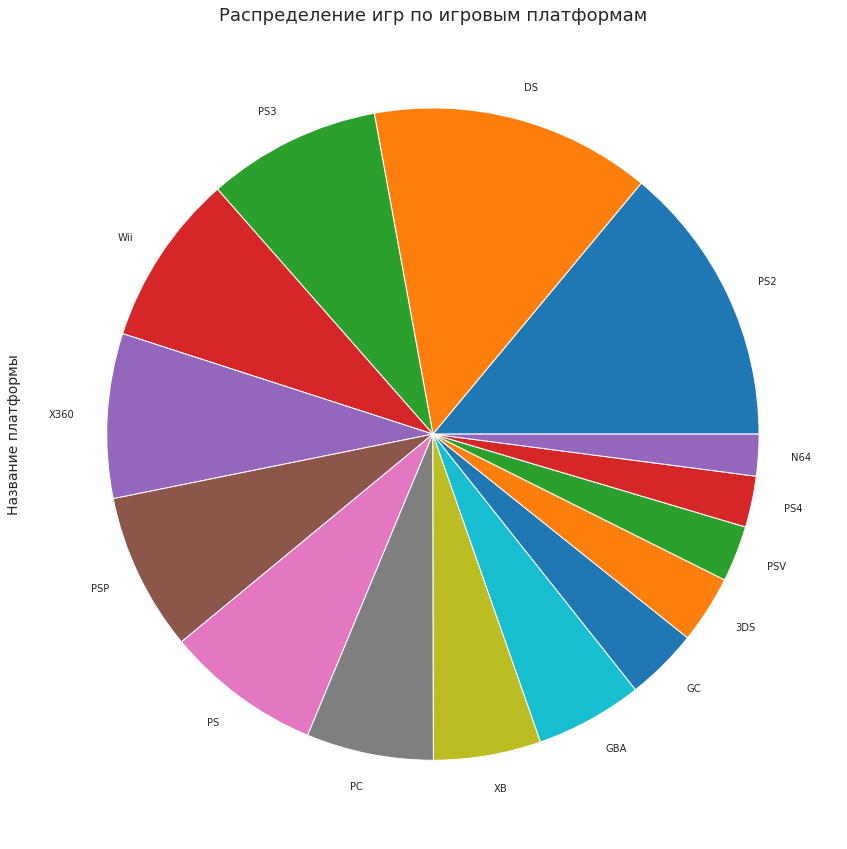

In [182]:
#построим круговую диаграмму
platform_sorted = df['platform'].value_counts(ascending=False)
platform_sorted.head(15).plot(kind='pie', figsize = (15,15));
plt.title('Распределение игр по игровым платформам', fontsize = 18)
plt.ylabel('Название платформы', fontsize = 14)
plt.show();

Ключевые игровые платформы - Playstation, DS, Wii, Xbox, PC

3) Year_of_Release - год выпуска

In [183]:
df[df['year_of_release'] > 0]['year_of_release'].value_counts()

2008    1440
2009    1431
2010    1271
2007    1202
2011    1153
2006    1020
2005     947
2002     845
2003     785
2004     765
2012     662
2015     606
2014     582
2013     547
2016     502
2001     484
1998     379
2000     350
1999     339
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64

In [184]:
len(df[df['year_of_release'] > 0]['year_of_release'].unique())

37

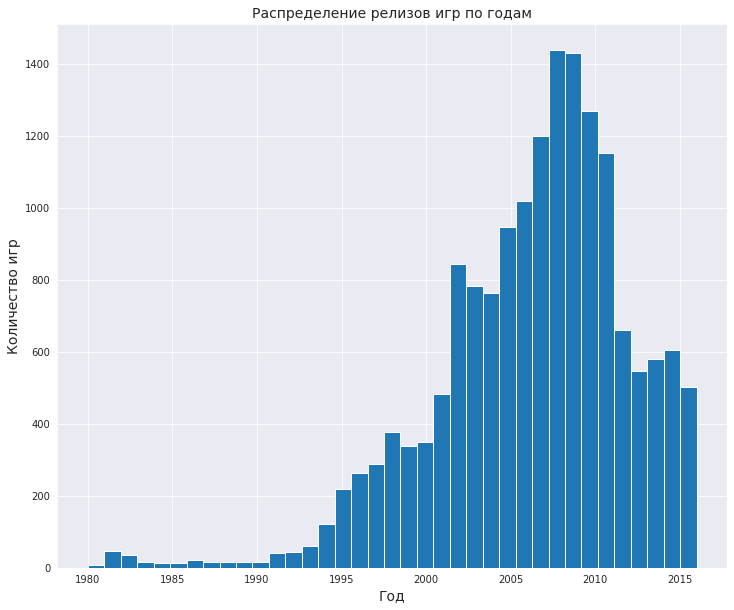

In [185]:
#строим гистограмму релизов игр по годам
df[df['year_of_release'] > 0]['year_of_release'].hist(bins=len(df[df['year_of_release'] > 0]['year_of_release'].unique()), figsize=(12,10));
plt.title("Распределение релизов игр по годам", fontsize=14)
plt.xlabel("Год", fontsize=14)
plt.ylabel("Количество игр", fontsize=14)
plt.show()

Из гистограммы видно - постепенный рост релизов с 1990 года, пик в 2007 - 2010 годах и резкий спад в количестве релизов после 2010 года. 

4) genre - жанр игр

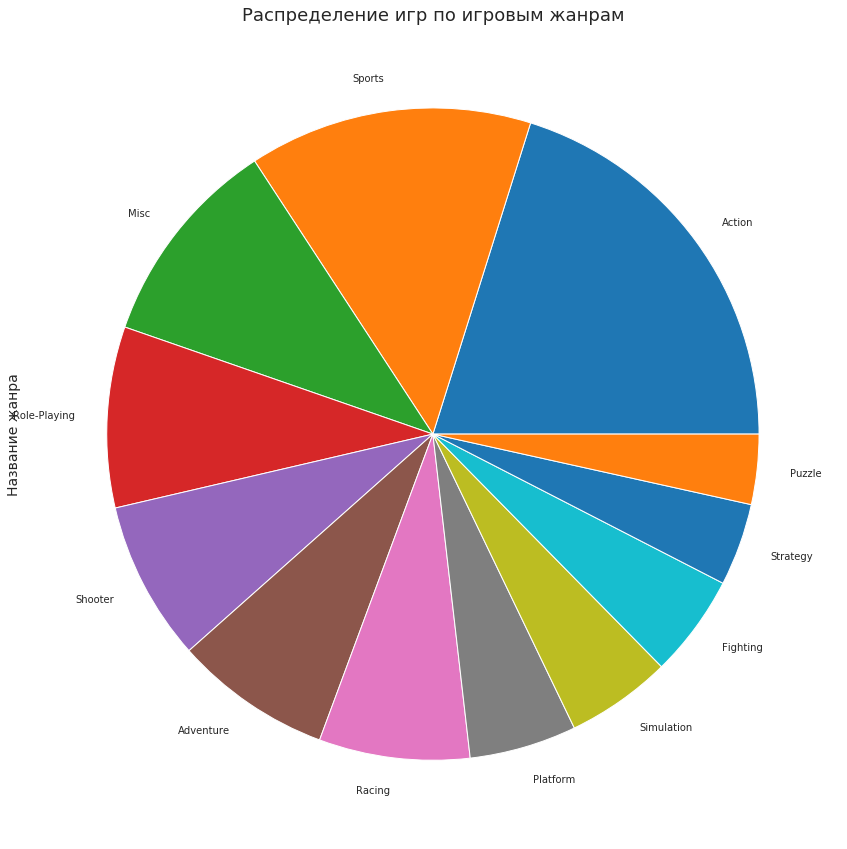

In [186]:
#построим круговую диаграмму распределения игр по игровым жанрам
platform_sorted = df['genre'].value_counts(ascending=False)
platform_sorted.plot(kind='pie', figsize = (15,15));
plt.title('Распределение игр по игровым жанрам', fontsize = 18)
plt.ylabel('Название жанра', fontsize = 14)
plt.show();

Самими популярными видами жанров являются экшн и спорт. Стратегии и пазл - наименее популярны.

5) na_sales, eu_sales, jp_sales, other_sales - количество продаж в Северной Америке, Европе, Японии и др.

Напишем функцию для пункта 5, которая будет строить гистограмму распределения.

Для пункта 5 сравним 4 графика по продажам:

In [187]:
def hist_builder(data_na, data_eu, data_jp, data_others, column_name, xrange, bins):
    ax = data_na.plot(kind='hist',
                     histtype='step',
                     bins=bins,
                      figsize=(12,10),
                     range=xrange,
                     alpha=0.5,
                     linewidth=4,
                     grid=True,
                     density=True,
                     legend=True,
                     label = column_name + ' в Северной Америке')
    data_eu.plot(kind='hist',
                histtype= 'step',
                bins=bins,
                ax=ax,
                range=xrange,
                alpha=0.5,
                linewidth=4,
                grid=True,
                density=True,
                legend=True,
                label=column_name + ' в Европе')
    data_jp.plot(kind='hist',
                histtype='step',
                bins=bins,
                 ax=ax,
                range=xrange,
                alpha = 0.5,
                linewidth= 4,
                grid=True,
                density=4,
                legend=True,
                label = column_name+ ' в Японии')
    data_others.plot(kind='hist',
                    histtype='step',
                    bins=bins,
                    ax=ax,
                    range=xrange,
                    alpha=0.5,
                    linewidth=4,
                    grid=True,
                    density=True,
                    legend=True,
                    label = column_name + ' в остальных странах')
    ax.set_title('Плотность распределения продаж по странам', fontsize = 12)
    ax.set_xlabel('Среднегодовое значение продаж', fontsize = 12)
    ax.set_ylabel('Плотность распределения продаж', fontsize = 12)
    plt.show()

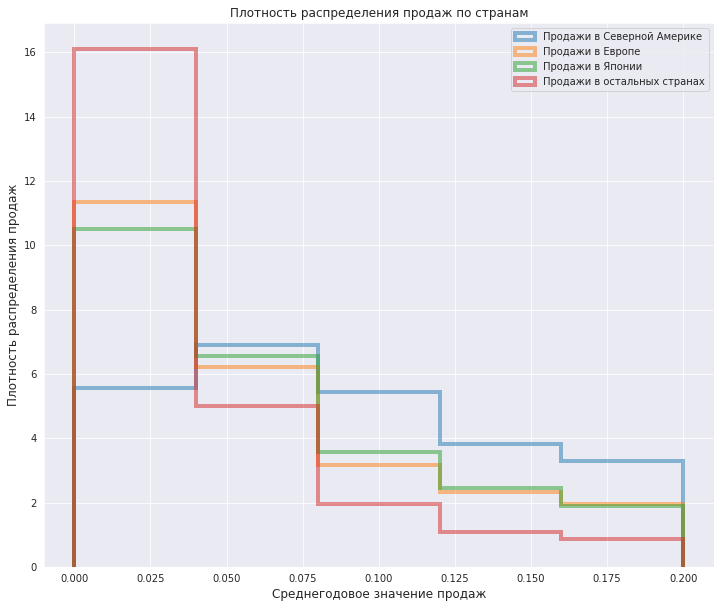

In [188]:
hist_builder(df[df['na_sales']>0]['na_sales'],
             df[df['eu_sales']>0]['eu_sales'],
             df[df['jp_sales']>0]['jp_sales'],
             df[df['other_sales']>0]['other_sales'],
             'Продажи',
             xrange=(0,0.2),
             bins=5)

Наблюдаем распределение, близкое к распределению Пуассона. Также можно отметить бОльшие продажи в С. Америке, далее по убыванию в Японии и в Европе. По остальным странам продажи меньше, чем в рассматриваемых трех странах.

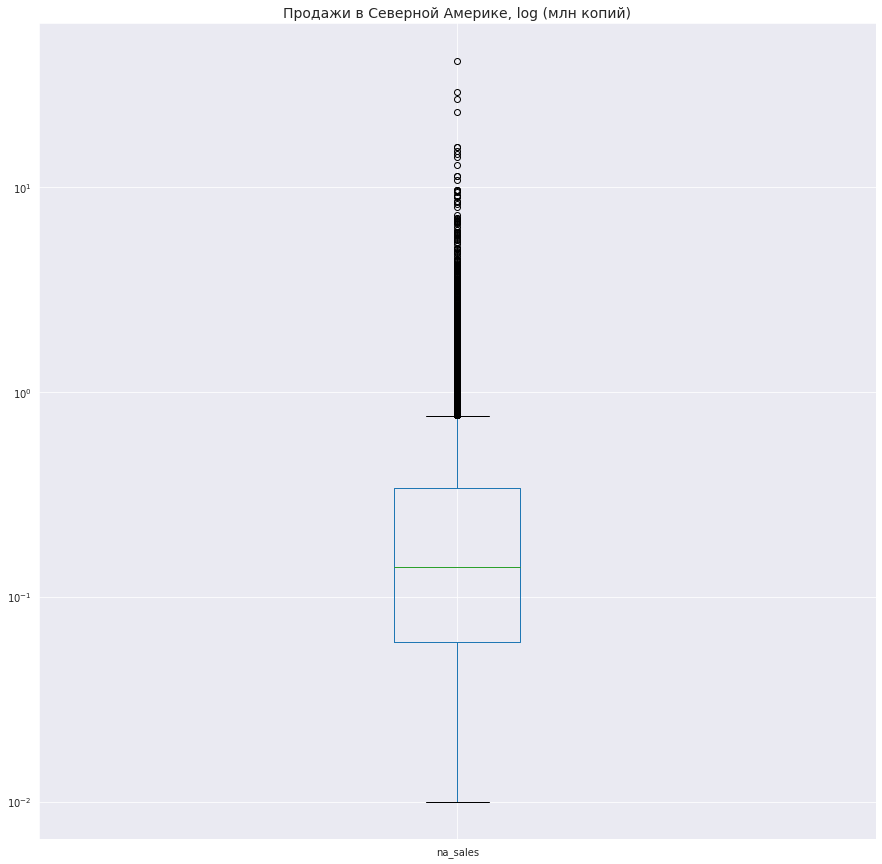

In [189]:
#проанализируем выбросы в данных
#для продаж в Северной Америке
plt.figure(figsize=(15,15))
plt.yscale('log')
df[df['na_sales'] > 0].boxplot('na_sales');
plt.title('Продажи в Северной Америке, log (млн копий)', fontsize = 14)
plt.show()

In [190]:
df[df['na_sales'] > 0]['na_sales'].describe()

count    12206.000000
mean         0.360525
std          0.933409
min          0.010000
25%          0.060000
50%          0.140000
75%          0.340000
max         41.360000
Name: na_sales, dtype: float64

Данные сильно скошены в сторону больших значений, среднее равно 0.36, а медиана 0.14. Первый квартиль Q1 = 0.06, третий Q3 = 0.14, межквартильный размерах IQR = Q3 - Q1 = 0.28. Значит, верхняя граница: Q3 + 1.5 IQR = 0.56.

In [191]:
print('Доля выбросов по столбцу na_sales равно', 
      round(len(df[df['na_sales']>0.56]['na_sales']) / len(df['na_sales']), 3))

Доля выбросов по столбцу na_sales равно 0.108


Почти 11% выбросов, не будем удалять эти данные для сохранения связи по остальным параметрам.

In [192]:
#посмотрим на лидера рынка в С. Америке
df[df['na_sales'] > 40]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E


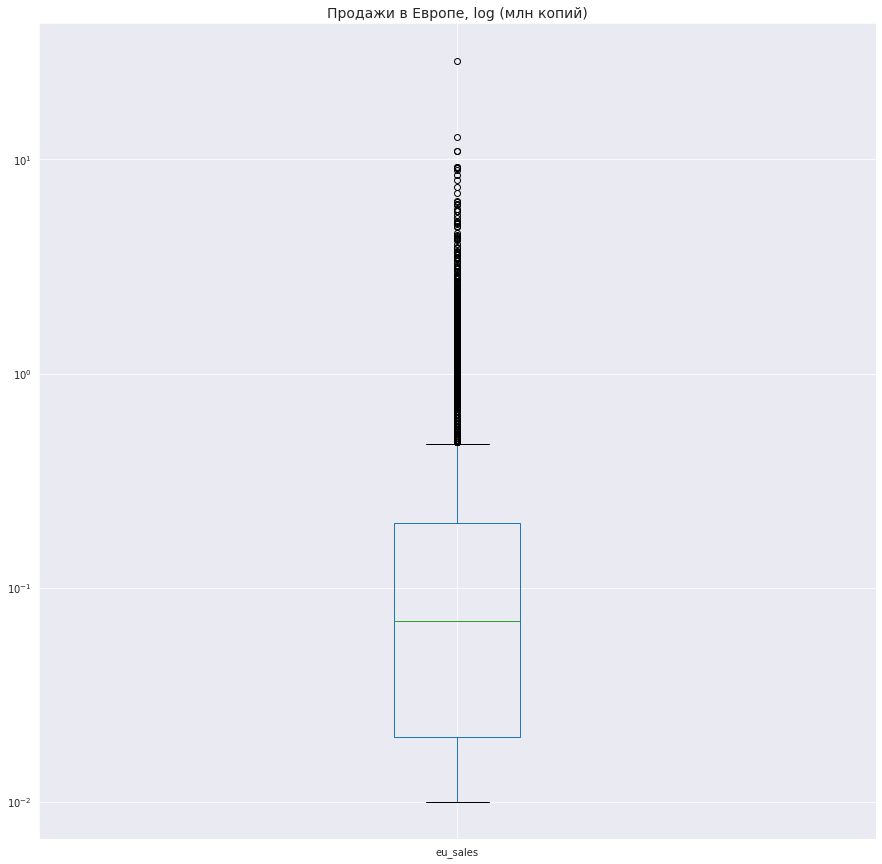

In [193]:
#для продаж в Европе
plt.figure(figsize=(15,15))
plt.yscale('log')
df[df['eu_sales'] > 0].boxplot('eu_sales');
plt.title('Продажи в Европе, log (млн копий)', fontsize = 14)
plt.show()

In [194]:
df[df['eu_sales'] > 0]['eu_sales'].describe()

count    10844.000000
mean         0.223547
std          0.610706
min          0.010000
25%          0.020000
50%          0.070000
75%          0.200000
max         28.960000
Name: eu_sales, dtype: float64

Данные сильно скошены в сторону больших значений, среднее равно 0.22, а медиана 0.07. Первый квартиль Q1 = 0.02, третий Q3 = 0.20, межквартильный размерах IQR = Q3 - Q1 = 0.18. Значит, верхняя граница: Q3 + 1.5 IQR = 0.62.

In [195]:
print('Доля выбросов по столбцу na_sales равно', 
      round(len(df[df['eu_sales']>0.62]['eu_sales']) / len(df['eu_sales']), 3))

Доля выбросов по столбцу na_sales равно 0.05


Около 5% выбросов, не будем удалять эти данные для сохранения связи по остальным параметрам.

In [196]:
#посмотрим на лидера рынка в Европе
df[df['eu_sales'] > 25]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E


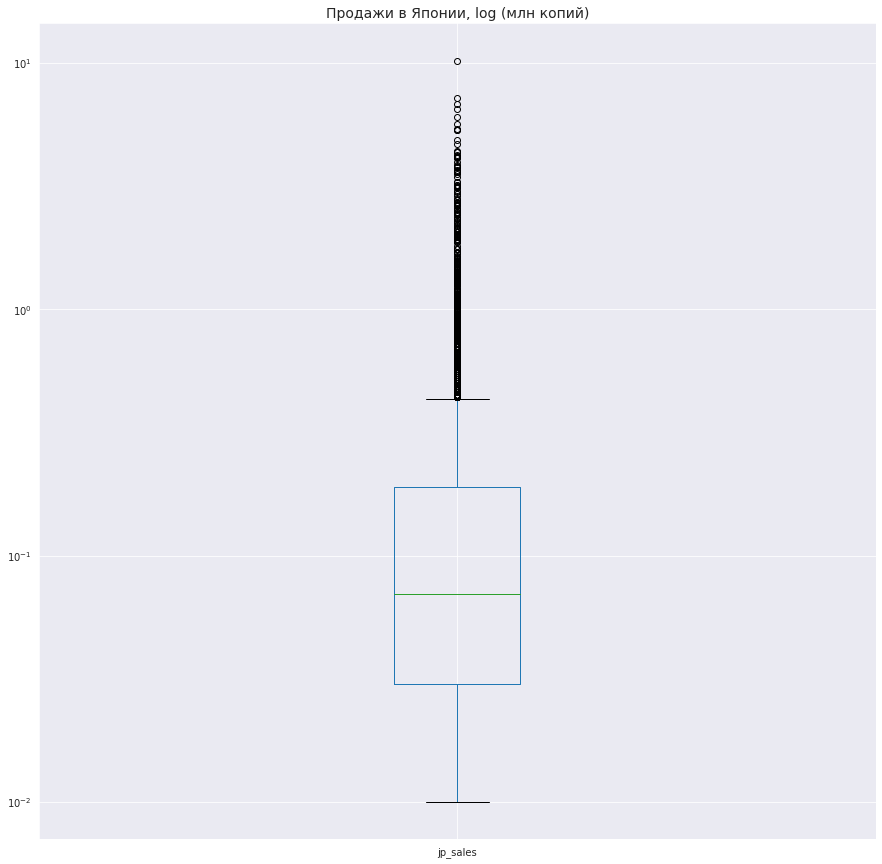

In [197]:
#для продаж в Японии
plt.figure(figsize=(15,15))
plt.yscale('log')
df[df['jp_sales'] > 0].boxplot('jp_sales');
plt.title('Продажи в Японии, log (млн копий)', fontsize = 14)
plt.show()

In [198]:
df[df['jp_sales'] > 0]['jp_sales'].describe()

count    6200.000000
mean        0.209248
std         0.479216
min         0.010000
25%         0.030000
50%         0.070000
75%         0.190000
max        10.220000
Name: jp_sales, dtype: float64

Данные сильно скошены в сторону больших значений, среднее равно 0.21, а медиана 0.07. Первый квартиль Q1 = 0.03, третий Q3 = 0.19, межквартильный размерах IQR = Q3 - Q1 = 0.16. Значит, верхняя граница: Q3 + 1.5 IQR = 0.43.

In [199]:
print('Доля выбросов по столбцу na_sales равно', 
      round(len(df[df['jp_sales']>0.43]['jp_sales']) / len(df['jp_sales']), 3))

Доля выбросов по столбцу na_sales равно 0.04


Около 4% выбросов, не будем удалять эти данные для сохранения связи по остальным параметрам.

In [200]:
#посмотрим на лидера рынка в Японии
df[df['jp_sales'] > 6]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN


In [201]:
df[df['name'] == 'Wii Sports']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E


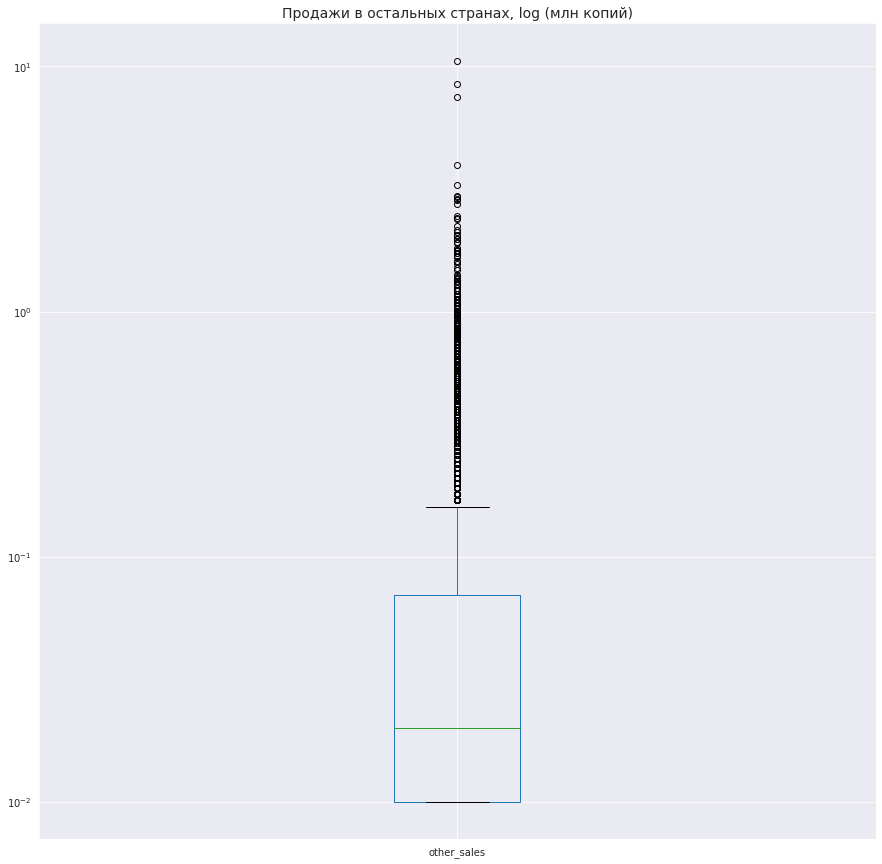

In [202]:
#для продаж в остальных странах
plt.figure(figsize=(15,15))
plt.yscale('log')
df[df['other_sales'] > 0].boxplot('other_sales');
plt.title('Продажи в остальных странах, log (млн копий)', fontsize = 14)
plt.show()

In [203]:
df[df['other_sales'] > 0]['other_sales'].describe()

count    10113.00000
mean         0.07824
std          0.23498
min          0.01000
25%          0.01000
50%          0.02000
75%          0.07000
max         10.57000
Name: other_sales, dtype: float64

Данные скошены в сторону больших значений, среднее равно 0.08, а медиана 0.02. Первый квартиль Q1 = 0.01, третий Q3 = 0.07, межквартильный размерах IQR = Q3 - Q1 = 0.06. Значит, верхняя граница: Q3 + 1.5 IQR = 0.16.

In [204]:
print('Доля выбросов по столбцу na_sales равно', 
      round(len(df[df['other_sales']>0.16]['other_sales']) / len(df['jp_sales']), 3))

Доля выбросов по столбцу na_sales равно 0.062


Около 6.2% выбросов, не будем удалять эти данные для сохранения связи по остальным параметрам.

In [205]:
#посмотрим на лидера рынка по остальным странам
df[df['other_sales'] > 8]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M


Интересный факт: Игра Wii Sports появилась в продаже вместе с приставкой, кроме того, за исключением Японии, она была вложена прямо в коробку с Wii. Видимо, в связи с этим, эта игра находится в списке лидеров для всех стран, кроме Японии.

6) critic_score, user_score

Найдем распределения оценок, построим гистограммы

In [206]:
df[['critic_score', 'user_score']].describe()

,critic_score,user_score
count,8137.000000,7590.000000
mean,68.967679,7.125046
std,13.938165,1.500006
min,13.000000,0.000000
25%,60.000000,6.400000
50%,71.000000,7.500000
75%,79.000000,8.200000
max,98.000000,9.700000


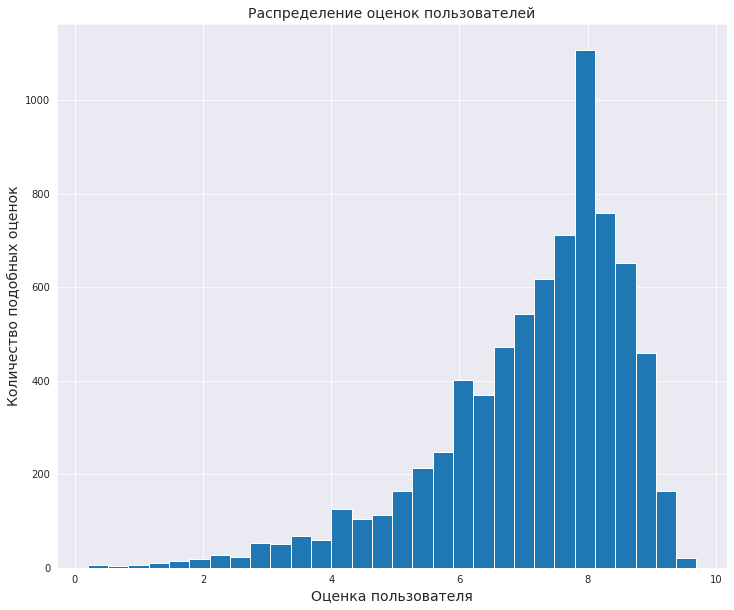

In [207]:
#построим гистограмму для оценок пользователей
df[df['user_score'] > 0]['user_score'].hist(bins=30, figsize=(12,10));
plt.title("Распределение оценок пользователей", fontsize=14)
plt.xlabel("Оценка пользователя", fontsize=14)
plt.ylabel("Количество подобных оценок", fontsize=14)
plt.show()

Из гистограммы видно, что самая частая оценка пользователей варируется от 7.5 до 8.5. При этом пользователи вне этого пика чаще ставят оценку ниже (до 7.5), чем выше (выше 8.5). Это отражается на среднем значении (7.1), которое меньше медианы (7.5). 

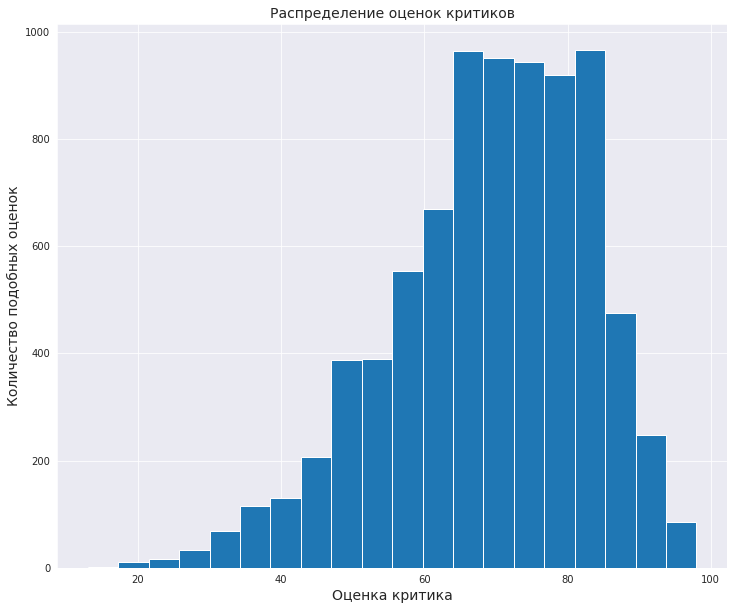

In [208]:
#построим гистограмму для оценок критиков
df['critic_score'].hist(bins=20, figsize=(12,10));
plt.title("Распределение оценок критиков", fontsize=14)
plt.xlabel("Оценка критика", fontsize=14)
plt.ylabel("Количество подобных оценок", fontsize=14)
plt.show()

Из гистограммы видно, что самая частая оценка критика варируется от 65 до 85. При этом критики вне этого пика чаще ставят оценку ниже (до 65), чем выше (выше 85). Это отражается на среднем значении (69), которое слегка меньше медианы (71). 

7) rating - рейтинг от организации ESRB

In [209]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Краткое описание:

- «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет.
- «K-A» -  ("Kids to Adults") первоначальное название «E» 
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. 
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.
- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет
- «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.

In [210]:
#посмотрим на количество каждой категории рейтинга
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Обратим внимание на те данные, которых мало:
- ЕС - всего 8 записей. То что подходит ребенку от 3 лет, подойдет и от 6 лет. Заменим эту категорию за E.
- К-А - всего 3 записи. Первоначально эта категория записывалась в группу E. Заменим эту категорию на E. 
- RP - всего 3 записи. Можно удалить эти данные, либо заменить на пропуски. Заменим, так как пропусков 40%, а все пропуски удалять некорректно.
- АО - всего 1 запись. Можно удалить эту запись. Единственная запись с взрослой категорией говорит о желании производителей игр охватить бОльшую часть населения (либо также может говорить о непредставительной выборке, но скорее первое)

In [211]:
df.shape[0]

16713

In [212]:
#производим замены по категориям рейтинга
df['rating'] = df['rating'].replace('EC', 'E')
df['rating'] = df['rating'].replace('K-A', 'E')
df['rating'] = df['rating'].replace('RP', np.nan)
df = df[df['rating'] != 'AO']

In [213]:
df.shape[0]

16712

In [214]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+'], dtype=object)

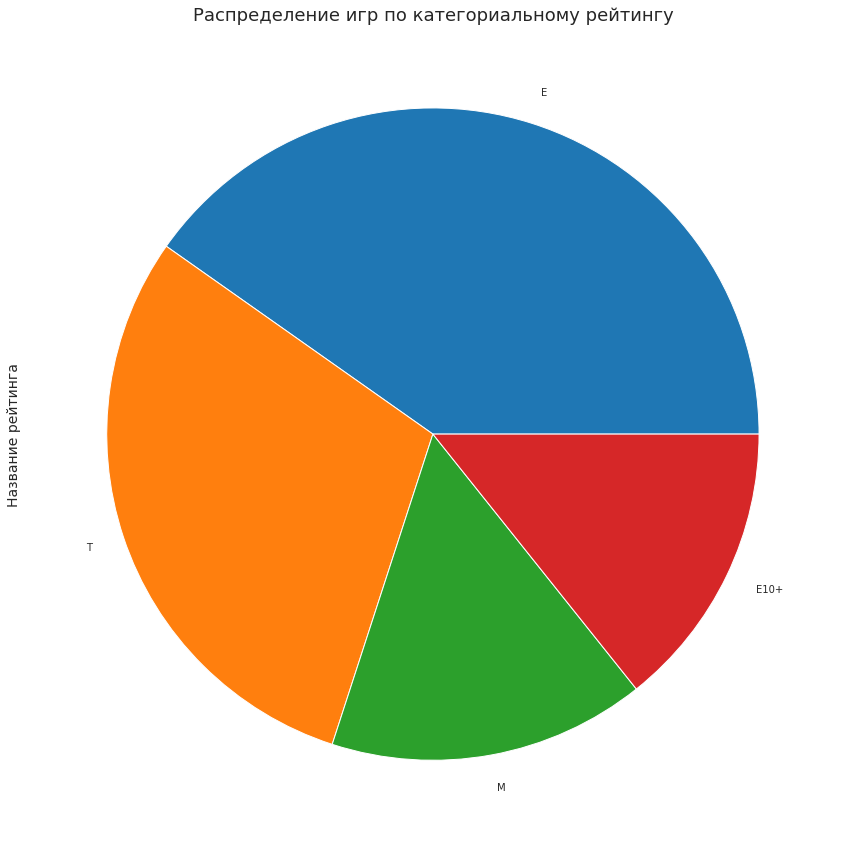

In [215]:
#построим круговую диаграмму для распределения рейтинга
rating_sorted = df['rating'].value_counts(ascending=False)
rating_sorted.plot(kind='pie', figsize = (15,15));
plt.title('Распределение игр по категориальному рейтингу', fontsize = 18)
plt.ylabel('Название рейтинга', fontsize = 14)
plt.show();

Посчитаем суммарные продажи во всех регионах и добавим эту информацию в таблицу.

In [216]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [217]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Посмотрим, если такие игры, которые не продавались вообще.

In [218]:
df[df['total_sales']==0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0


Всего две записи о играх, которые не продавались. Их можно удалить

In [219]:
df.shape[0]

16712

In [220]:
df = df[df['total_sales']!=0]

In [221]:
df.shape[0]

16710

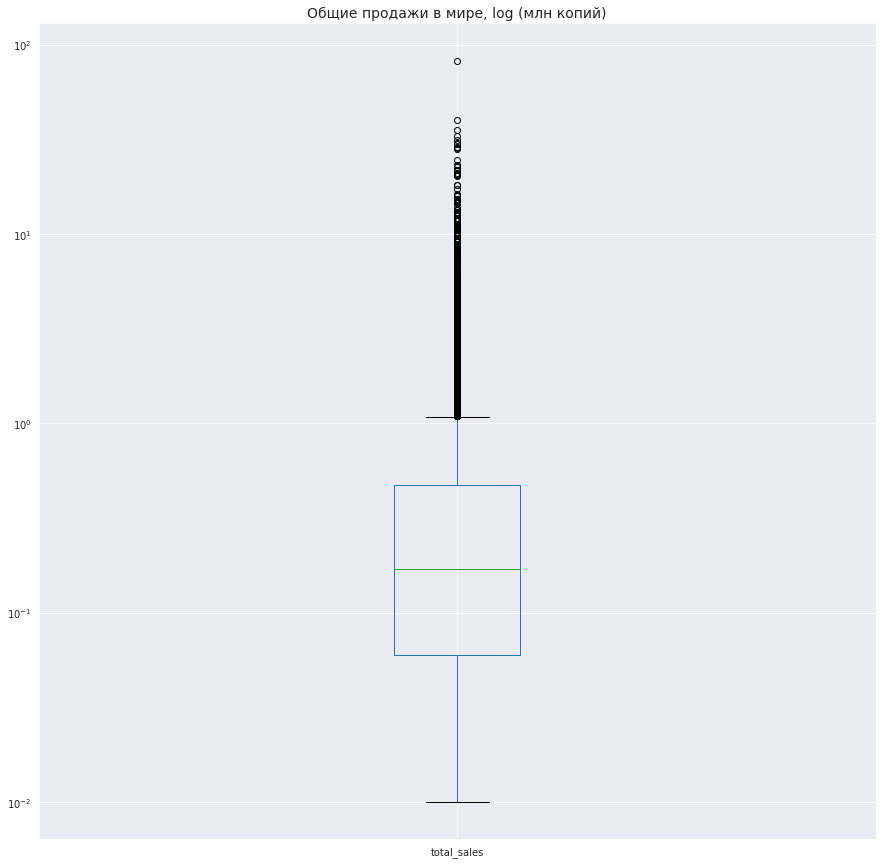

In [222]:
#строим диаграмму размаха для общих продаж
plt.figure(figsize=(15,15))
plt.yscale('log')
df[df['total_sales'] > 0].boxplot('total_sales');
plt.title('Общие продажи в мире, log (млн копий)', fontsize = 14)
plt.show()

In [223]:
df['total_sales'].describe()

count    16710.000000
mean         0.533293
std          1.548371
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

Данные сильно скошены в сторону больших значений, среднее равно 0.53, а медиана 0.17. Первый квартиль Q1 = 0.06, третий Q3 = 0.47, межквартильный размерах IQR = Q3 - Q1 = 0.41. Значит, верхняя граница: Q3 + 1.5 IQR = 1.085.

In [224]:
print('Доля выбросов по столбцу na_sales равно', 
      round(len(df[df['total_sales']>1.085]['total_sales']) / len(df['total_sales']), 3))

Доля выбросов по столбцу na_sales равно 0.113


Почти 11% выбросов, не будем удалять эти данные для сохранения связи по остальным параметрам.

In [225]:
#посмотрим на лидера рынка по остальным странам
df[df['total_sales'] > 80]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54


Лидер все тот же Wii Sports, но только не в Японии.

Подведем итоги по выполненной работе.

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16710 entries, 0 to 16714
Data columns (total 12 columns):
name               16710 non-null object
platform           16710 non-null object
year_of_release    16710 non-null int64
genre              16710 non-null object
na_sales           16710 non-null float64
eu_sales           16710 non-null float64
jp_sales           16710 non-null float64
other_sales        16710 non-null float64
critic_score       8136 non-null float64
user_score         7589 non-null float64
rating             9945 non-null object
total_sales        16710 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


In [227]:
df.shape

(16710, 12)

In [228]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,8136.000000,7589.000000,16710.000000
mean,1988.951765,0.263274,0.145035,0.077639,0.047346,68.964725,7.124852,0.533293
std,186.922342,0.813596,0.503388,0.308897,0.186757,13.936474,1.500009,1.548371
min,-1.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


**Выводы по пункту 2:**

- Были обработаны пропуски столбцов Name, Genre, Year_of_Release, User_Score, а также проанализированы пропуски столбцов Critic_Score, Rating
- Пропуски по столбцу Year_of_Release заменили на -1. Всего удалено 2 пропуска (общие для столбцов Name и Genre)
- Причиной пропусков могут служить ошибки при выгрузке данных либо ошибки на этапе сбора информации
- Приведены регистры в названиях столбцов к нижнему.
- Заменены типы данных по столбцам User_score и Year_of_Release на float и int, соответственно.
- Для продаж наблюдаем распределение, близкое к распределению Пуассона. Также можно отметить бОльшие продажи в С. Америке, далее по убыванию в Японии и в Европе. По остальным странам продажи меньше, чем в рассматриваемых трех странах.
- Примерно 70% - уникальные игры, остальные 30% могут означать, например, что игры выходили на разные приставки.
- Ключевые игровые платформы - Playstation, DS, Wii, Xbox, PC
- Из гистограммы релизов по годам виден постепенный рост релизов с 1990 года, пик в 2007 - 2010 годах и резкий спад в количестве релизов после 2010 года. 
- Самими популярными видами жанров являются экшн и спорт. Стратегии и пазл - наименее популярны.
- Данные по продажам сильно скошены в сторону больших значений. Имеет место быть значительное количество выбросов.  Не стали удалять эти данные для сохранения связи по остальным параметрам.
- Интересный факт: Игра Wii Sports появилась в продаже вместе с приставкой, кроме того, за исключением Японии, она была вложена прямо в коробку с Wii. Видимо, в связи с этим, эта игра находится в списке лидеров для всех стран, кроме Японии.
- Из гистограммы видно, что самая частая оценка пользователей варируется от 7.5 до 8.5. При этом пользователи вне этого пика чаще ставят оценку ниже (до 7.5), чем выше (выше 8.5). Это отражается на среднем значении (7.1), которое меньше медианы (7.5). 
- Из гистограммы видно, что самая частая оценка критика варируется от 65 до 85. При этом критики вне этого пика чаще ставят оценку ниже (до 65), чем выше (выше 85). Это отражается на среднем значении (69), которое слегка меньше медианы (71). 
- По рейтингу: ЕС, К-А и RP заменили на Е. АО (1 запись удалена).
- Посчитали суммарные продажи во всех регионах и добавили эту информацию в таблицу. Две записи с нулевыми продажами были удалены.
- Необходимо выяснить, с чем связано такое количество пропусков в данных по столбцам оценки пользователей, критиков, а также категориального рейтинга игры (возможно, проблема при сборе или выгрузке).

Итог: Удалено 5 записей, данные подготовлены, можно приступать к пункту работы №3

## Проведение исследовательского анализа данных

**Cколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

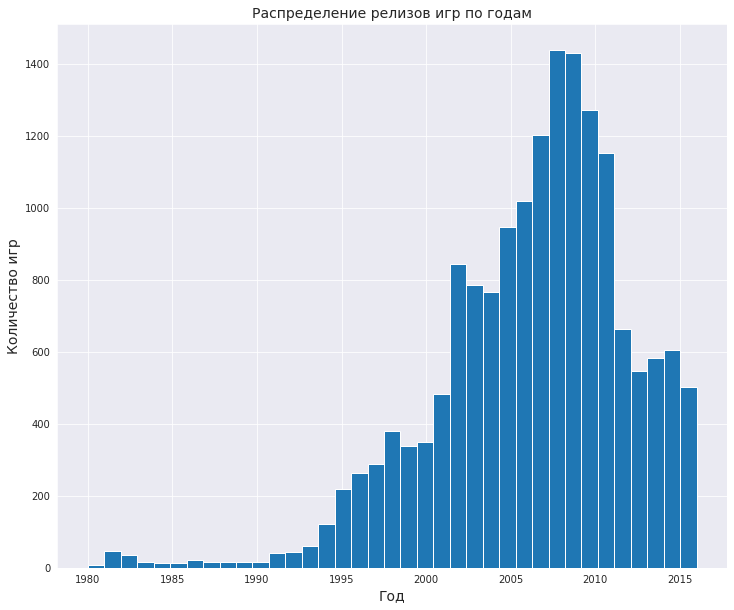

In [229]:
#построим гистограмму для релизов игр по годам
df[df['year_of_release'] > 0]['year_of_release'].hist(bins=len(df[df['year_of_release'] > 0]['year_of_release'].unique()), figsize=(12,10));
plt.title("Распределение релизов игр по годам", fontsize=14)
plt.xlabel("Год", fontsize=14)
plt.ylabel("Количество игр", fontsize=14)
plt.show()

Из гистограммы видно - постепенный рост релизов с 1990 года, пик в 2007 - 2010 годах и резкий спад в количестве релизов после 2010 года. Данные до 1990 года не актуальны. Данные от 1990 до 2012 года - постепенный рост кол-ва релизов и резкое падение 2010-2012 годов, возможно, из-за развития других сфер развлечений. Следовательно, актуальный период на данном предварительно примем с 2010 года, когда тренд количества релизов стал более очевидным.

**2) Как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [230]:
#построим сводную таблицу продаж по платформам + по годам
df[df['year_of_release']>=2010].pivot_table(index=['year_of_release', 'platform'], values=['total_sales'], aggfunc='sum').reset_index()

,year_of_release,platform,total_sales
0,2010,3DS,0.32
1,2010,DS,85.35
2,2010,PC,26.15
3,2010,PS2,6.59
4,2010,PS3,142.96
...,...,...,...
61,2016,PSV,4.25
62,2016,Wii,0.18
63,2016,WiiU,4.60
64,2016,X360,1.52


In [231]:
#напишем функцию для отображения продаж различных платформ
def popularity_builder(data, year_threshold):

    plt.figure(figsize=(20,15))
    
    sns.set_style('darkgrid')
    sns.lineplot(data = df[df['year_of_release']>=year_threshold].pivot_table(index=['year_of_release', 'platform'], values=['total_sales'], aggfunc='sum').reset_index(),
                         x='year_of_release',
                         y='total_sales', 
                         hue = 'platform')

    plt.title('Общие продажи по платформам от ' + str(year_threshold) + ' года', fontsize = 12)
    plt.xlabel('Год', fontsize = 12)
    plt.ylabel('Общие продажи, млн копий', fontsize = 12)
    plt.show()

Посмотрим на общий график с 1990 года

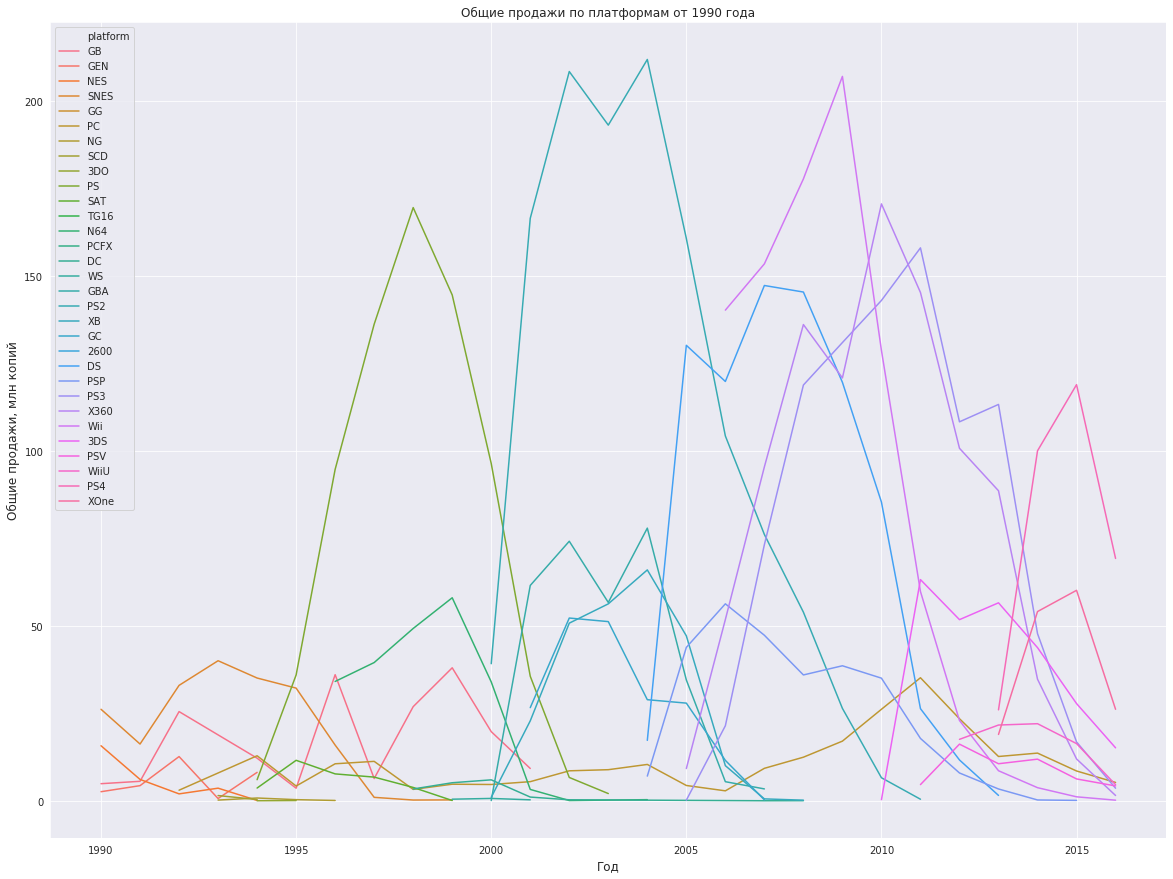

In [232]:
#посмотрим на график с 1990 года
popularity_builder(df, 1990)

**Из графика выше видно, что игровые приставки в среднем популярны около 5 лет.**

Посмотрим на график в периода спада 2010-2012, а также после него с 2012 года

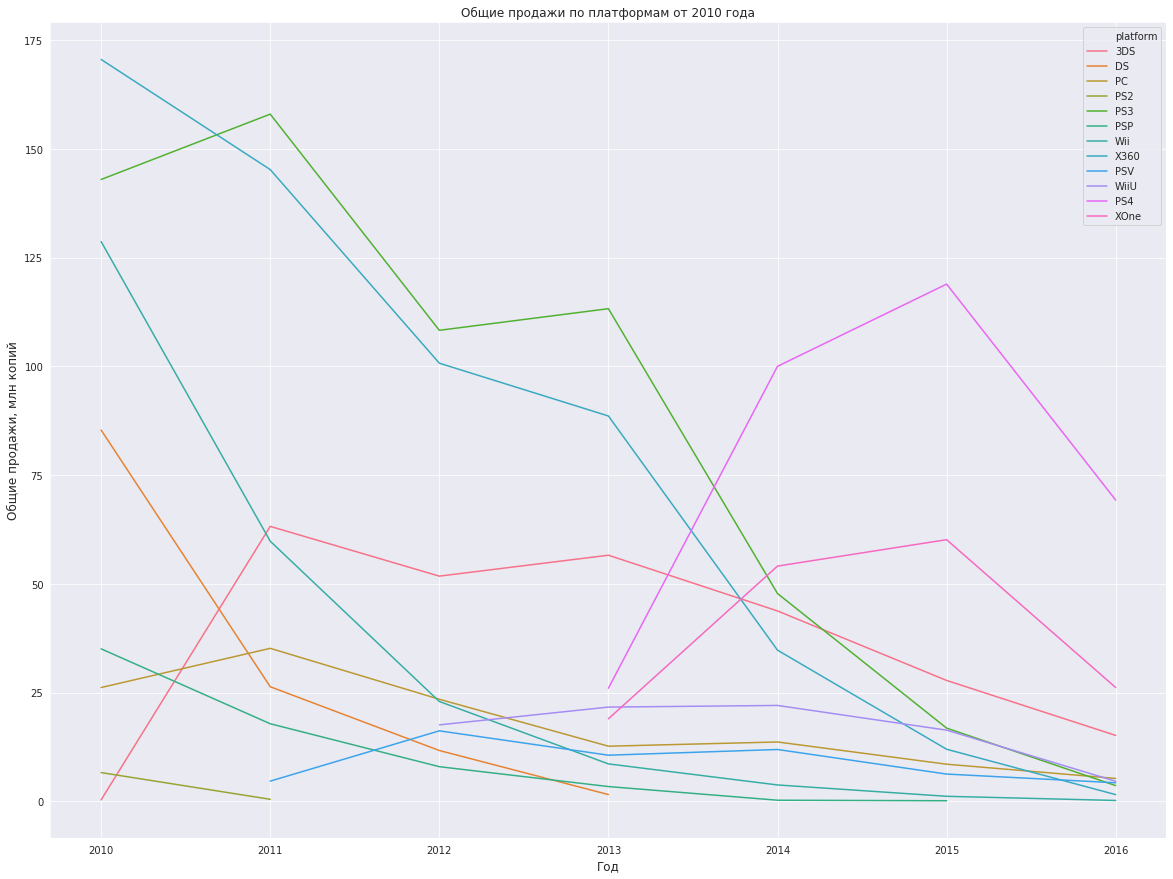

In [233]:
#посмотрим на график с 2010 года
popularity_builder(df, 2010)

Из графика выше видно, что с 2012 года тренд спада общих объемов продаж почти по всем оставшимся платформам сменяется небольшими стабильными продажами.

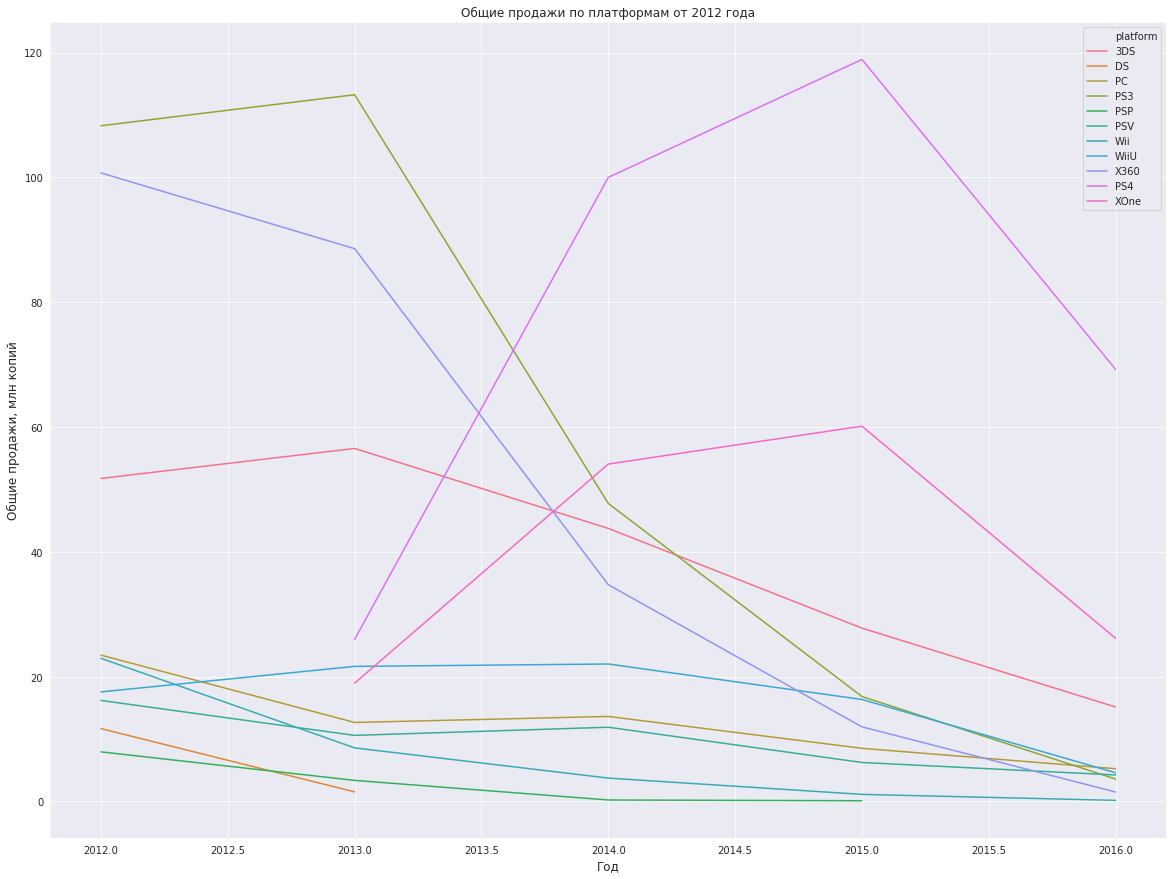

In [234]:
#посмотрим на график с 2012 года
popularity_builder(df, 2012)

Наиболее популярными в последнее время являются XOne и PS4. Однако, рост их популярности (2013-2015 гг) сменяется спадающим трендом (2015-2016 гг).

Посмотрим на самые продаваемые игровые платформы за 2015 + 2016 года, а также самые продаваемые за все время

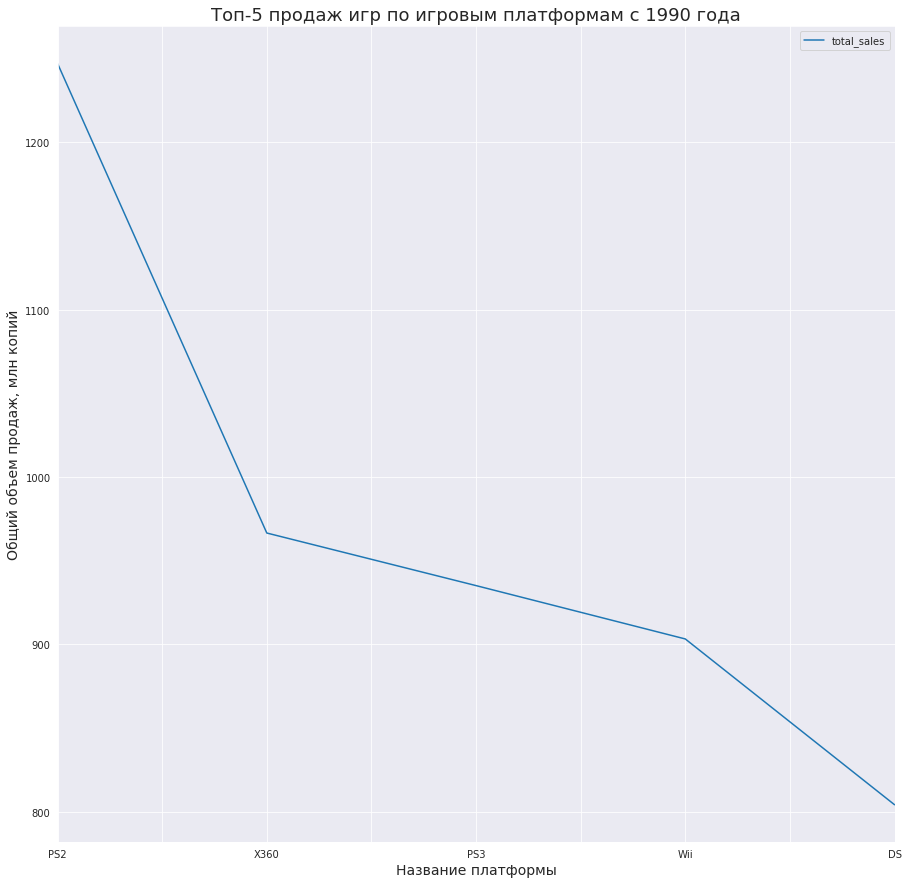

In [235]:
#построим график c 1990 года
platform_sorted = df[df['year_of_release'] >=1990].groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False).reset_index()
platform_sorted.head(5).plot(kind='line', figsize = (15,15), x='platform');
plt.title('Топ-5 продаж игр по игровым платформам с 1990 года', fontsize = 18)
plt.ylabel('Общий объем продаж, млн копий', fontsize = 14)
plt.xlabel('Название платформы', fontsize = 14)
plt.show();

Самим популярными платформами за все время (с 1990 года) являются PS2, X360, PS3, Wii, DS.

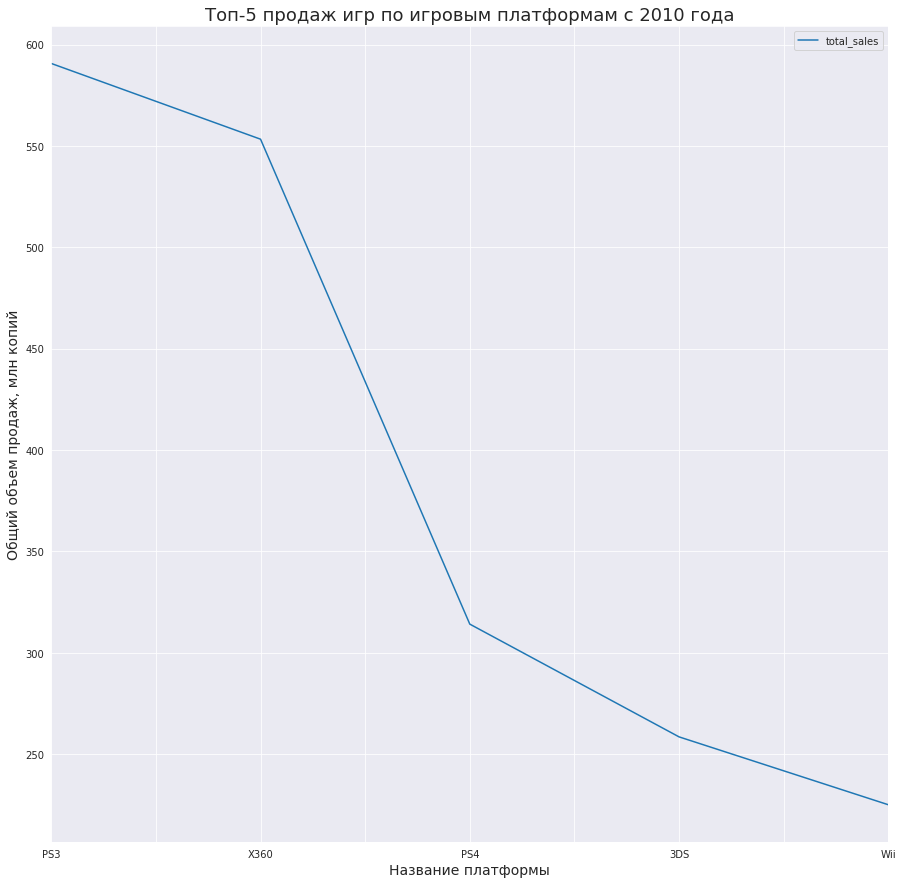

In [236]:
#построим график c 2010 года
platform_sorted = df[df['year_of_release'] >=2010].groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False).reset_index()
platform_sorted.head(5).plot(kind='line', figsize = (15,15), x='platform');
plt.title('Топ-5 продаж игр по игровым платформам с 2010 года', fontsize = 18)
plt.ylabel('Общий объем продаж, млн копий', fontsize = 14)
plt.xlabel('Название платформы', fontsize = 14)
plt.show();

Самим популярными платформами за время с 2010 года являются PS3, X360, PS4, 3DS, Wii

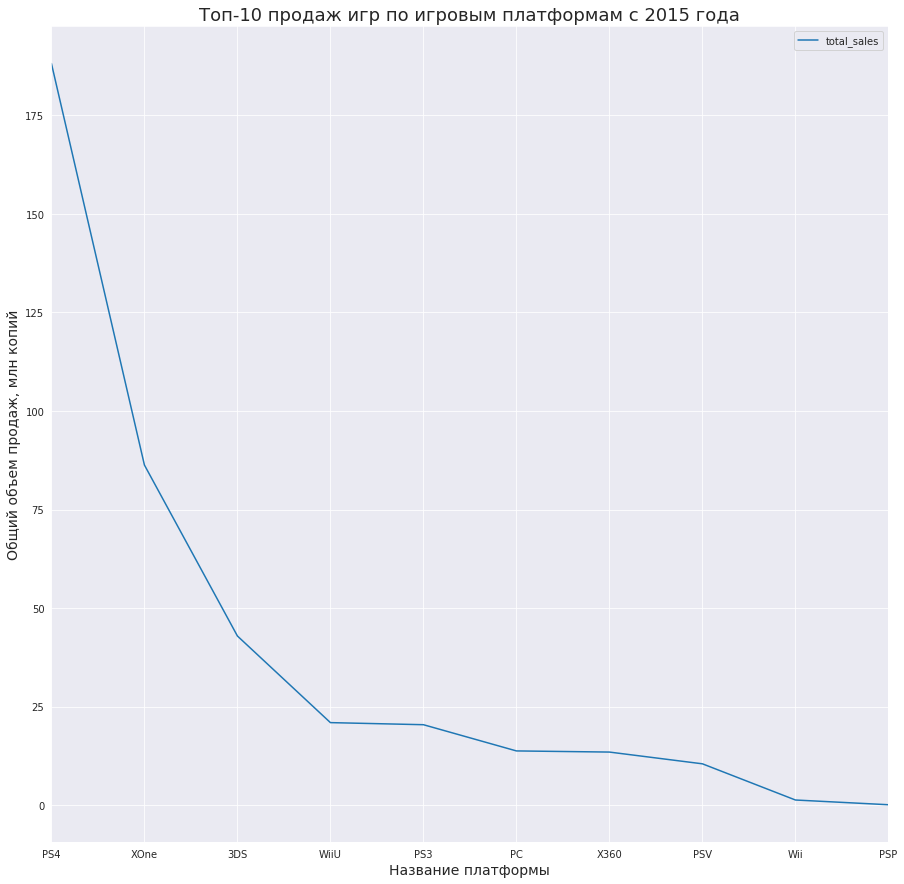

In [237]:
#построим график c 2015 года
platform_sorted = df[df['year_of_release'] >=2015].groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False).reset_index()
platform_sorted.head(10).plot(kind='line', figsize = (15,15), x='platform');
plt.title('Топ-10 продаж игр по игровым платформам с 2015 года', fontsize = 18)
plt.ylabel('Общий объем продаж, млн копий', fontsize = 14)
plt.xlabel('Название платформы', fontsize = 14)
plt.show();

Самим популярными платформами за время с 2015 года являются PS4, XOne, 3DS, WiiU, PS3, PC, X360, PSV, Wii, PSP. Для будущего исследования будем использовать самую представительную модель компании: PS4, XOne, 3DS, WiiU, PC. Посмотрим на их прибыльность за все время.

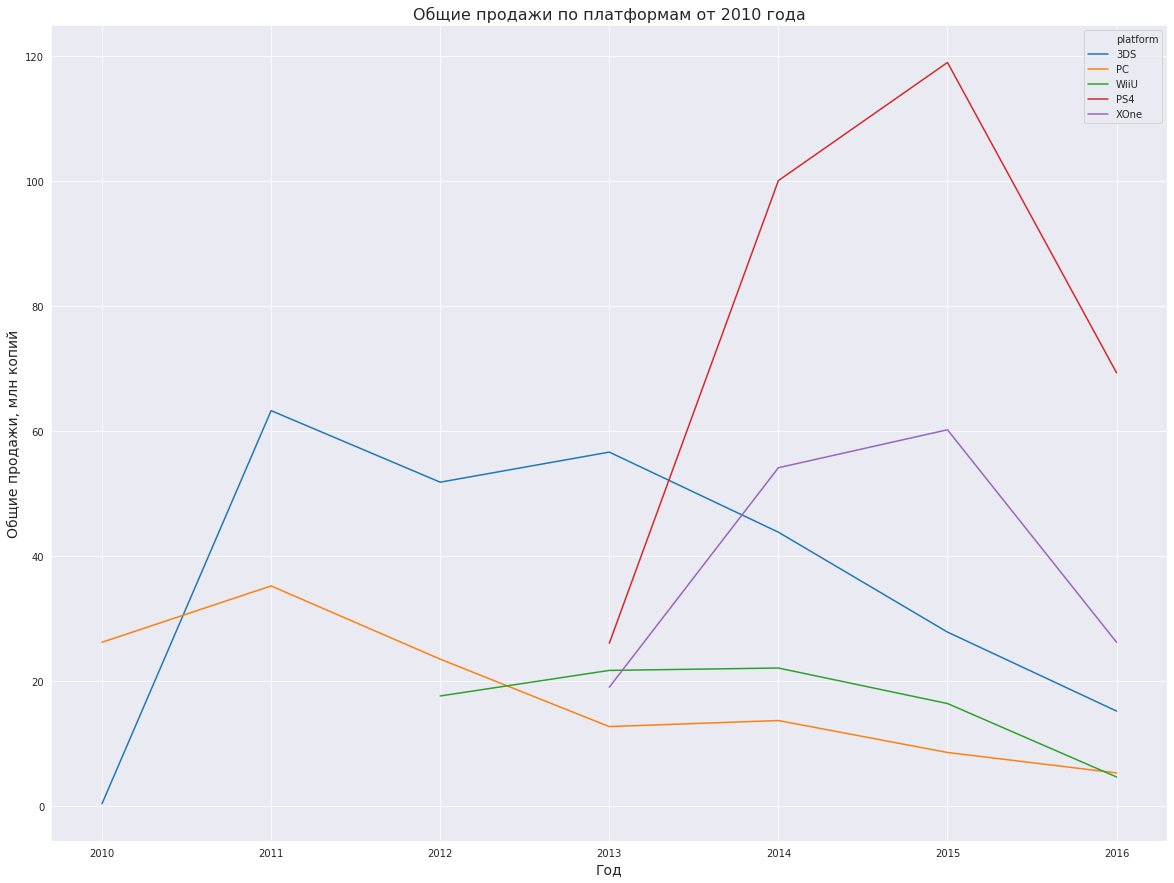

In [238]:
popular_platform = ['PS4', 'XOne', '3DS', 'WiiU', 'PC']
#посмотрим на график с 2010 года
df_popular = df.query('platform in @popular_platform')

plt.figure(figsize=(20,15))
    
sns.set_style('darkgrid')
sns.lineplot(data = df_popular[df_popular['year_of_release']>=2010].pivot_table(index=['year_of_release', 'platform'], values=['total_sales'], aggfunc='sum').reset_index(),
                     x='year_of_release',
                     y='total_sales', 
                     hue = 'platform')

plt.title('Общие продажи по платформам от ' + str(2010) + ' года', fontsize = 16)
plt.xlabel('Год', fontsize = 14)
plt.ylabel('Общие продажи, млн копий', fontsize = 14)
plt.show()


По ключевыем компаниям имеем:
- 3DS - Рост с 2010 - 2011 гг, планка (60 млн копий) 2011 - 2013 гг., плавное падение с 2013 - 2016 гг
- PC - Плавное падение с 2011 г (35 млн копий) до 2016 года (около 7 - 8 млн копий)
- WiiU - Плавный рост с 2012 - 2014 гг (пик - чуть более 20 млн копий), падение с 2014 - 2016 гг (до 7 - 8 млн копий
- PS4 - значительный рост с 2013 - 2015 гг (пик - самый большой относительно остальных платформ - почти 120 млн копий), и стремительное падение к 2016 (до 70 млн копий)
- XOne -поведение аналогично PS4 по периодам роста и спада, однако меньший пик покупок (60 млн копий), а падение примерно до 25 млн копий

**Все платформы находятся в состоянии падения по продажам на 2016 год.**

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

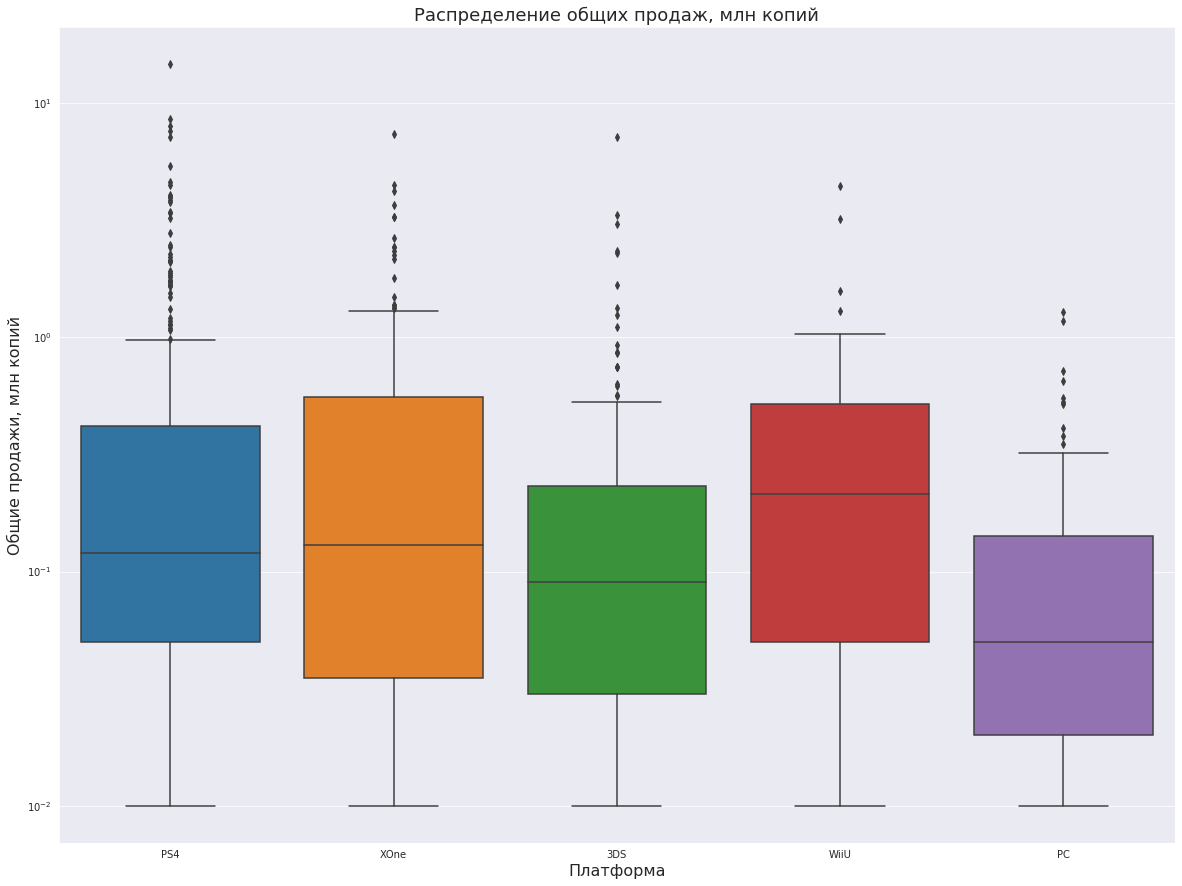

In [239]:
def boxplot_builder(data):
    
    plt.figure(figsize=(20,15))
    
    plt.yscale('log')
    sns.set_style('darkgrid')
    sns.boxplot(data = data, x = 'platform', y = 'total_sales')
    
    plt.xlabel('Платформа', fontsize = 16)
    plt.ylabel('Общие продажи, млн копий', fontsize = 16)
    plt.title('Распределение общих продаж, млн копий', fontsize = 18)
    plt.show()
    
boxplot_builder(df_popular[df_popular['year_of_release'] >=2015])

In [240]:
#данные по популярным платформам с 2010
df_popular = df_popular[df_popular['year_of_release']>=2010]

In [241]:
#посмотрим на статистику по PS4
df_popular[df_popular['platform'] == 'PS4']['total_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

In [242]:
#посмотрим на статистику по 3DS
df_popular[df_popular['platform'] == '3DS']['total_sales'].describe()

count    515.000000
mean       0.502000
std        1.437252
min        0.010000
25%        0.050000
50%        0.120000
75%        0.335000
max       14.600000
Name: total_sales, dtype: float64

In [243]:
#посмотрим на статистику по PC
df_popular[df_popular['platform'] == 'PC']['total_sales'].describe()

count    488.000000
mean       0.255779
std        0.529919
min        0.010000
25%        0.030000
50%        0.080000
75%        0.230000
max        5.140000
Name: total_sales, dtype: float64

In [244]:
#посмотрим на статистику по XOne
df_popular[df_popular['platform'] == 'XOne']['total_sales'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

In [245]:
#посмотрим на статистику по WiiU
df_popular[df_popular['platform'] == 'WiiU']['total_sales'].describe()

count    147.000000
mean       0.559116
std        1.058836
min        0.010000
25%        0.080000
50%        0.220000
75%        0.525000
max        7.090000
Name: total_sales, dtype: float64

Для всех платформ среднее значение (c 2010 года) больше, чем медиана. Из диаграммы размаха наблюдаем большое количество выбросов, которые не будем удалять сохранения данных для анализа. Наибольшее среднее значение продаж - для PS4 (0.8 млн копий), наименьшее - для PC (0.26 млн копий). Наибольшая медиана продаж - WiiU и XOne (0.22 млн копий), наименьшая - PC (0.08 млн копий). Наибольшая дисперсия - для PS4, наименьшая - для PC.

Интересно заметить, что хоть среднее значение продаж больше для PS4, но медианные продажи больше для WiiU и XOne. Это говорит о бОльшей стабильности продаж последних (WiiU и XOne).

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.**

In [246]:
#напишем функцию определения коэффициента корреляции и постройки графика
def corr_builder(platform, column, xlabel, xrange, with_median = False, visibility = 0.5, nn_quantile = df_popular['total_sales'].quantile(0.99)):
    ax = df_popular[df_popular['platform']==platform].plot(
        x = column,
        y = 'total_sales',
        kind = 'scatter',
         style = 'ob',
        alpha = visibility,
        figsize = (8, 8),
        xlim = xrange,
        ylim = (0, nn_quantile),
        grid = True,
        )
    if (with_median):
        (df_popular[df_popular['platform']==platform].groupby(column)['total_sales'].agg(['median']).plot(
        ax = ax,
        y = 'median',
        xlim = xrange,
        style = '-og',
        label = 'median',
        legend = True,
        grid = True)) 
    plt.title('Распределение для параметра "{0}" по платорме {1}'.format(xlabel, platform), fontsize = 18)
    plt.ylabel('Общий объем продаж для платформы {0}, млн копий'.format(platform), fontsize = 14)
    plt.xlabel(xlabel, fontsize = 14)
    plt.show()
        
    if (df_popular[df_popular['platform']==platform]['total_sales'].corr(df_popular[df_popular['platform']==platform][column]) > 0.7):
        print('Значительная положительная корреляция между двумя параметрами total_sales и ',
              column,
              df_popular[df_popular['platform']==platform]['total_sales'].corr(df_popular[df_popular['platform']==platform][column]))
    elif (df_popular[df_popular['platform']==platform]['total_sales'].corr(df_popular[df_popular['platform']==platform][column]) > 0.3):
        print('Положительная корреляция между двумя параметрами total_sales и ',
              column,
              df_popular[df_popular['platform']==platform]['total_sales'].corr(df_popular[df_popular['platform']==platform][column]))
    elif (df_popular[df_popular['platform']==platform]['total_sales'].corr(df_popular[df_popular['platform']==platform][column]) > -0.3):
        print('Околонулевая корреляция между двумя параметрами total_sales и ',
              column,
              df_popular[df_popular['platform']==platform]['total_sales'].corr(df_popular[df_popular['platform']==platform][column]))
    elif (df_popular[df_popular['platform']==platform]['total_sales'].corr(df_popular[df_popular['platform']==platform][column]) > -0.7):
        print('Отрицательная корреляция между двумя параметрами total_sales и ',
              column,
              df_popular[df_popular['platform']==platform]['total_sales'].corr(df_popular[df_popular['platform']==platform][column]))
    else:
        print('Значительная отрицательная корреляция между двумя параметрами total_sales и ',
              column,
              df_popular[df_popular['platform']==platform]['total_sales'].corr(df_popular[df_popular['platform']==platform][column]))

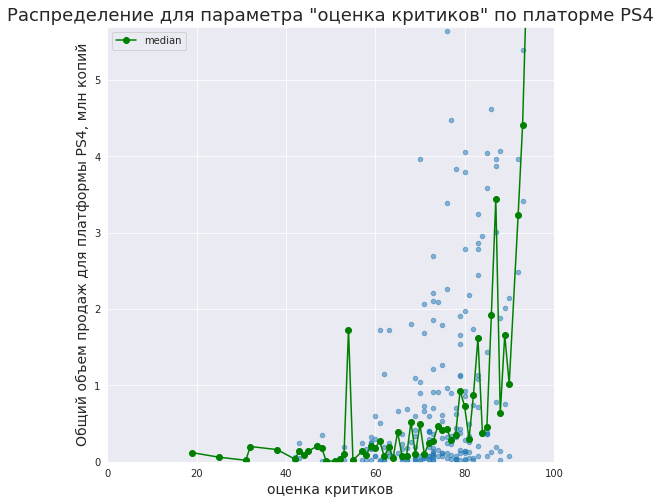

Положительная корреляция между двумя параметрами total_sales и  critic_score 0.406567902061781


In [247]:
#PS4-critic_score график
corr_builder('PS4','critic_score', 'оценка критиков', xrange=(0,100), with_median=True)

По графику видно, что с ростом оценок критиков, растут и общие продажи

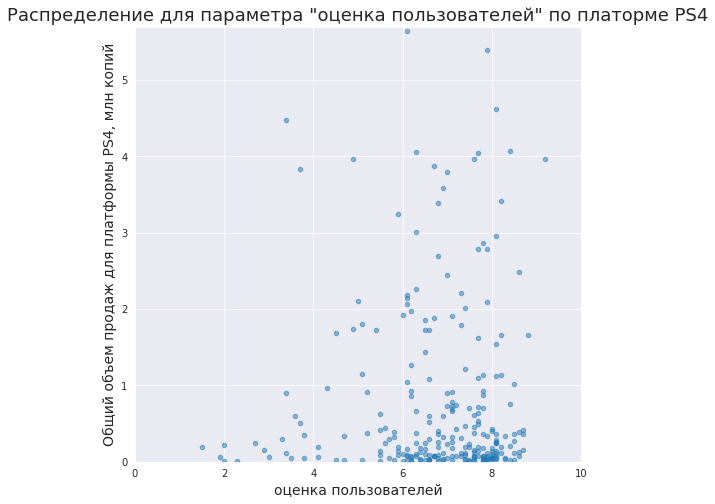

Околонулевая корреляция между двумя параметрами total_sales и  user_score -0.031957110204556424


In [248]:
#PS4-user_score график
corr_builder('PS4', 'user_score','оценка пользователей', xrange=(0,10), with_median=False)

По графику видно, что с ростом оценок пользователей, слегка растут и общие продажи. Отрицательный коэффициент корреляции обусловлен артефактами в данных.

Посмотрим на коэффициенты корреляции для разных платформ из выделенного ТОП-5.

In [249]:
print("Таблица коэффициентов корреляций для суммарных продаж total_sales")
(df_popular.groupby('platform')[['user_score', 'critic_score', 'total_sales']].
 agg('corr').
 reset_index().
 query('level_1 == "total_sales"').
 reset_index(drop=True).
 iloc[:, [0,2,3]]
)

Таблица коэффициентов корреляций для суммарных продаж total_sales


,platform,user_score,critic_score
0,3DS,0.222305,0.348216
1,PC,-0.016365,0.337270
2,PS4,-0.031957,0.406568
3,WiiU,0.400219,0.348380
4,XOne,-0.068925,0.416998


- Положительная корреляция между пользовательскими отзывами и суммарными продажами наблюдается для платформы WiiU (0.40) и для 3DS (0.22). Для остальных приставок наблюдается околонулевая корреляция по данным столбцам.
- Положительная корреляция между отзывами критиков и суммарными продажами наблюдается для платформы всех платформ (в диапазоне от 0.25 для PC - 0.41 - для XOne и PS4).

Посмотрим на общее распределение игр по жанрам.

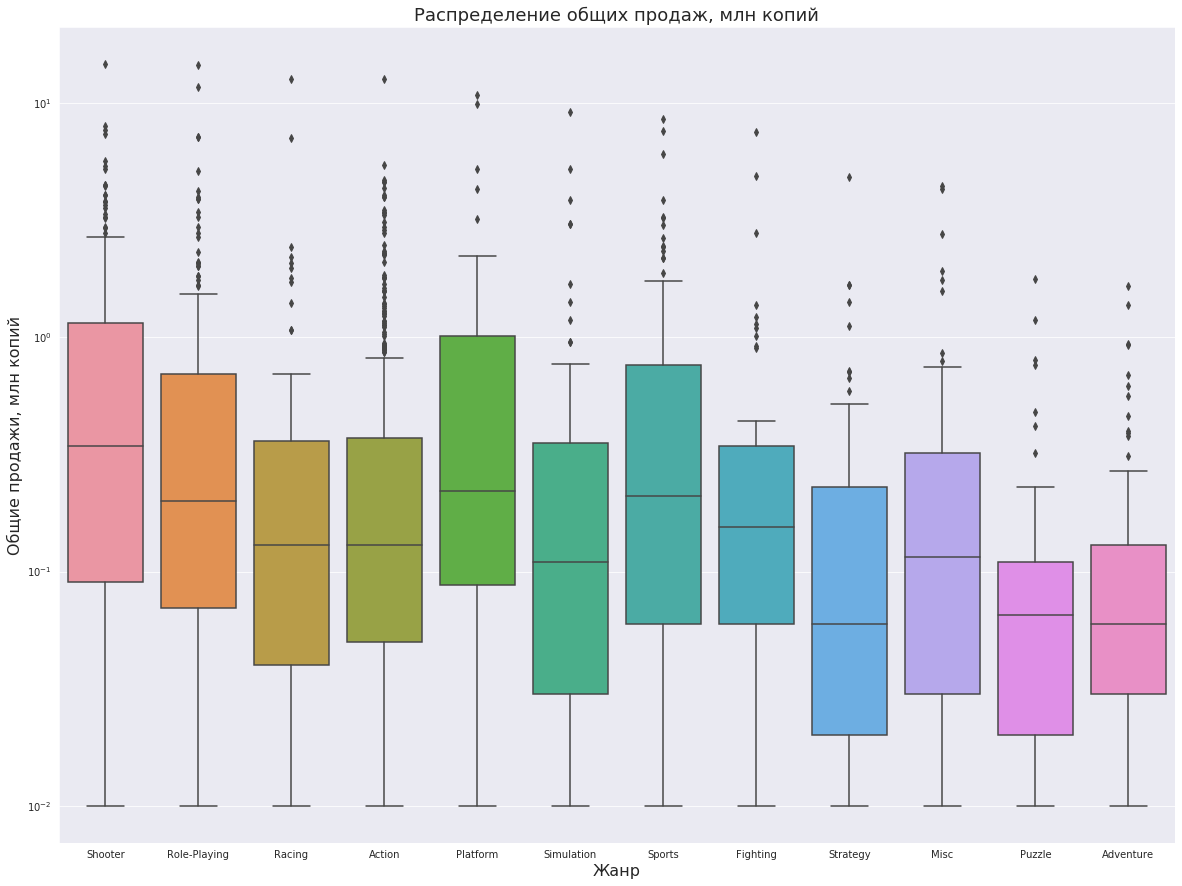

In [250]:
def boxplot_genre_builder(data):
    
    plt.figure(figsize=(20,15))
    
    plt.yscale('log')
    sns.set_style('darkgrid')
    sns.boxplot(data = data, x = 'genre', y = 'total_sales')
    
    plt.xlabel('Жанр', fontsize = 16)
    plt.ylabel('Общие продажи, млн копий', fontsize = 16)
    plt.title('Распределение общих продаж, млн копий', fontsize = 18)
    plt.show()
    
boxplot_genre_builder(df_popular)

In [251]:
#напишем функцию для вывода статистики
genres_to_find = ['Shooter', 'Role-Playing', 'Platform', 'Simulation', 'Strategy', 'Puzzle']
def find_genres_statistics(genres_to_find):
    for genre in genres_to_find:
        genre_median = df_popular[df_popular['genre']== genre]['total_sales'].median()
        genre_mean = round(df_popular[df_popular['genre']== genre]['total_sales'].mean(),2)
        print('Медиана продаж жанра {0} равна {1} млн копий, а среднее продаж равно {2} млн копий'.format(genre, genre_median, genre_mean))
        
find_genres_statistics(genres_to_find)

Медиана продаж жанра Shooter равна 0.345 млн копий, а среднее продаж равно 1.06 млн копий
Медиана продаж жанра Role-Playing равна 0.2 млн копий, а среднее продаж равно 0.73 млн копий
Медиана продаж жанра Platform равна 0.22 млн копий, а среднее продаж равно 0.93 млн копий
Медиана продаж жанра Simulation равна 0.11 млн копий, а среднее продаж равно 0.47 млн копий
Медиана продаж жанра Strategy равна 0.06 млн копий, а среднее продаж равно 0.24 млн копий
Медиана продаж жанра Puzzle равна 0.065 млн копий, а среднее продаж равно 0.19 млн копий


- Самые прибыльные жанры (по медиане) - Shooter, Role-Playing, Platform и Simulation. 
- Самые "не" прибыльные жанры - Stategy м Puzzle.

**Выводы по пункту 3:**

- По данным были выделены постепенный рост релизов с 1990 года, пик в 2007 - 2010 годах и резкий спад в количестве релизов после 2010 года. Данные до 1990 года не актуальны. Данные от 1990 до 2012 года - постепенный рост кол-ва релизов и резкое падение 2010-2012 годов, возможно, из-за развития других сфер развлечений. Следовательно, актуальный период приняли с 2010 года, когда тренд количества релизов стал более очевидным.
- Игровые приставки в среднем популярны около 5 лет.
- Самим популярными платформами за время с 2015 года являются PS4, XOne, 3DS, WiiU, PS3, PC, X360, PSV, Wii, PSP. Для  исследования использовали самую представительную модель компании: PS4, XOne, 3DS, WiiU, PC.


По ключевыем приставкам имеем:
- 3DS - Рост с 2010 - 2011 гг, планка (60 млн копий) 2011 - 2013 гг., плавное падение с 2013 - 2016 гг
- PC - Плавное падение с 2011 г (35 млн копий) до 2016 года (около 7 - 8 млн копий)
- WiiU - Плавный рост с 2012 - 2014 гг (пик - чуть более 20 млн копий), падение с 2014 - 2016 гг (до 7 - 8 млн копий
- PS4 - значительный рост с 2013 - 2015 гг (пик - самый большой относительно остальных платформ - почти 120 млн копий), и стремительное падение к 2016 (до 70 млн копий)
- XOne -поведение аналогично PS4 по периодам роста и спада, однако меньший пик покупок (60 млн копий), а падение примерно до 25 млн копий
- Все платформы находятся в состоянии падения по продажам на 2016 год.
- Для всех платформ среднее значение (c 2010 года) больше, чем медиана. Из диаграммы размаха наблюдаем большое количество выбросов, которые не будем удалять сохранения данных для анализа. Наибольшее среднее значение продаж - для PS4 (0.8 млн копий), наименьшее - для PC (0.26 млн копий). Наибольшая медиана продаж - WiiU и XOne (0.22 млн копий), наименьшая - PC (0.08 млн копий). Наибольшая дисперсия - для PS4, наименьшая - для PC.
- Интересно заметить, что хоть среднее значение продаж больше для PS4, но медианные продажи больше для WiiU и XOne. Это говорит о бОльшей стабильности продаж последних (WiiU и XOne).
- Положительная корреляция между пользовательскими отзывами и суммарными продажами наблюдается для платформы WiiU (0.40) и для 3DS (0.22). Для остальных приставок наблюдается околонулевая корреляция по данным столбцам.
- Положительная корреляция между отзывами критиков и суммарными продажами наблюдается для платформы всех платформ (в диапазоне от 0.25 для PC - 0.41 - для XOne и PS4).

## Определение портрета для пользователя каждого региона (NA, EU, JP)

Определим:
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5). 
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [252]:
#функция для построения топ-5
def top5_builder(data, xcolumn, ycolumn, xlabel, region):
    data.plot(kind='bar', x = xcolumn, y = ycolumn, figsize=(20,15), fontsize=16)
    plt.title('Топ-5 продаж игр по параметру "{0}" с 2010 года для региона "{1}"'.format(xlabel, region), fontsize = 18)
    plt.ylabel('Общий объем продаж, млн копий', fontsize = 18)
    plt.xlabel(xlabel, fontsize = 18)
    plt.show();

In [253]:
#Самые популярные платформы (топ-5) Северной Америки.
USA_sales = (
    (df[df['year_of_release']>=2010].                         
     groupby('platform')[['na_sales']].                        
     agg('sum').                      
     sort_values(by = 'na_sales', ascending=False).
     reset_index()
    )             
)
USA_sales

,platform,na_sales
0,X360,335.93
1,PS3,230.47
2,Wii,122.68
3,PS4,108.74
4,XOne,93.12
5,3DS,83.11
6,DS,60.42
7,PC,39.87
8,WiiU,38.10
9,PSV,12.47


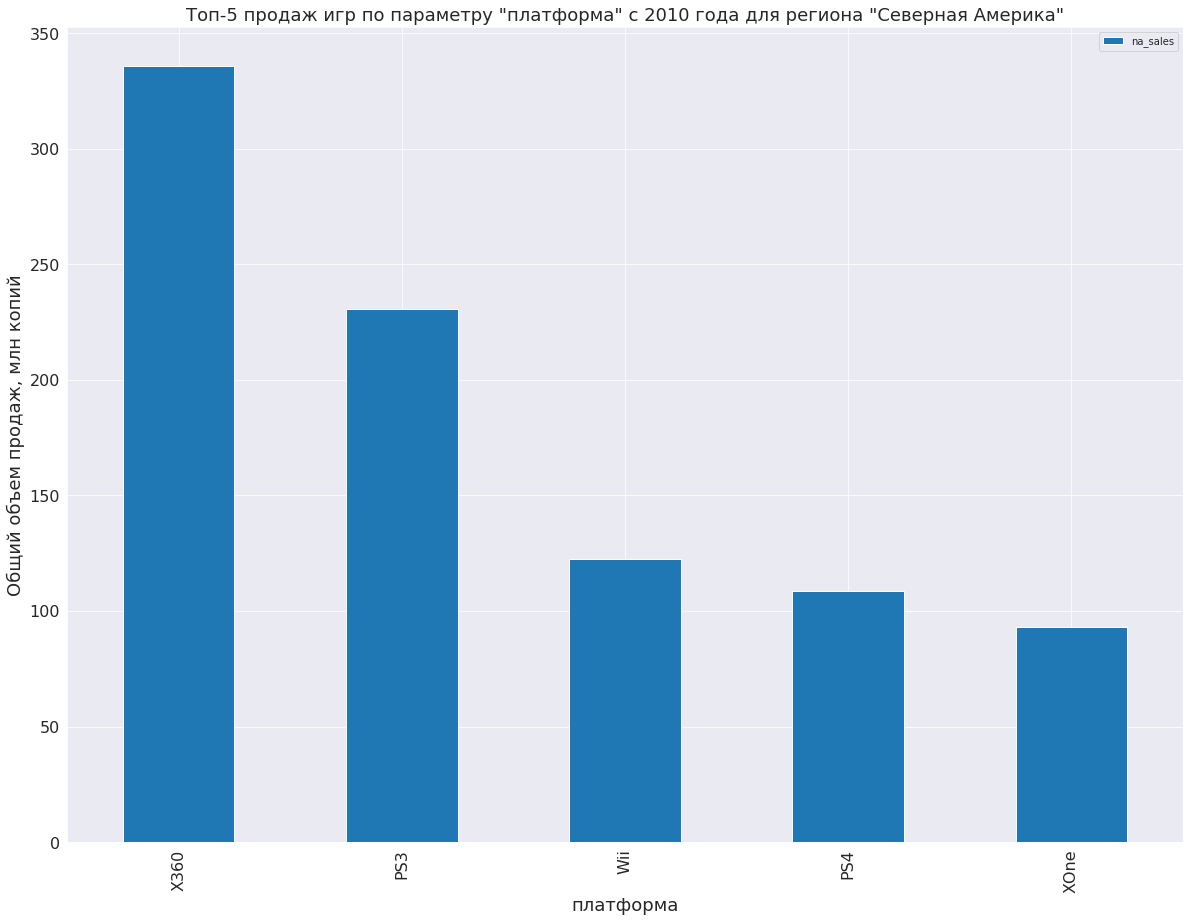

In [254]:
top5_builder(USA_sales.head(5), 'platform', 'na_sales', 'платформа', 'Северная Америка')

In [255]:
#Самые популярные платформы (топ-5) Европы.
EU_sales = (
    (df[df['year_of_release']>=2010].                         
     groupby('platform')[['eu_sales']].                        
     agg('sum').                      
     sort_values(by = 'eu_sales', ascending=False).
     reset_index()
    )             
)
EU_sales

,platform,eu_sales
0,PS3,214.74
1,X360,164.29
2,PS4,141.09
3,PC,70.50
4,Wii,66.35
5,3DS,61.46
6,XOne,51.59
7,DS,28.34
8,WiiU,25.13
9,PSV,13.07


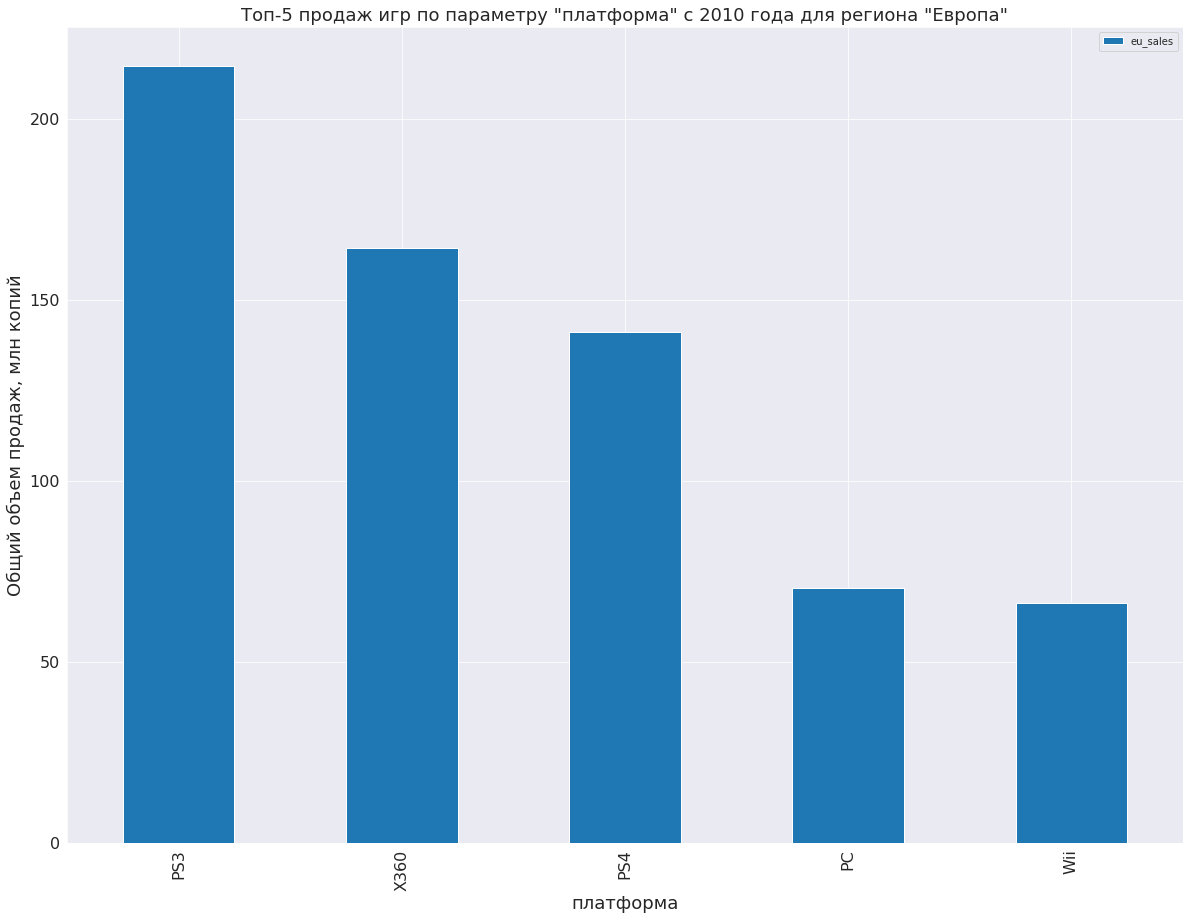

In [256]:
top5_builder(EU_sales.head(5), 'platform', 'eu_sales', 'платформа', 'Европа')

In [257]:
#Самые популярные платформы (топ-5) Японии.

In [258]:
JP_sales = (
    (df[df['year_of_release']>=2010].                         
     groupby('platform')[['jp_sales']].                        
     agg('sum').                      
     sort_values(by = 'jp_sales', ascending=False).
     reset_index()
    )             
)
JP_sales

,platform,jp_sales
0,3DS,100.64
1,PS3,59.36
2,PSP,42.44
3,DS,27.90
4,PSV,21.84
5,Wii,17.75
6,PS4,15.96
7,WiiU,13.01
8,X360,5.47
9,PS2,0.80


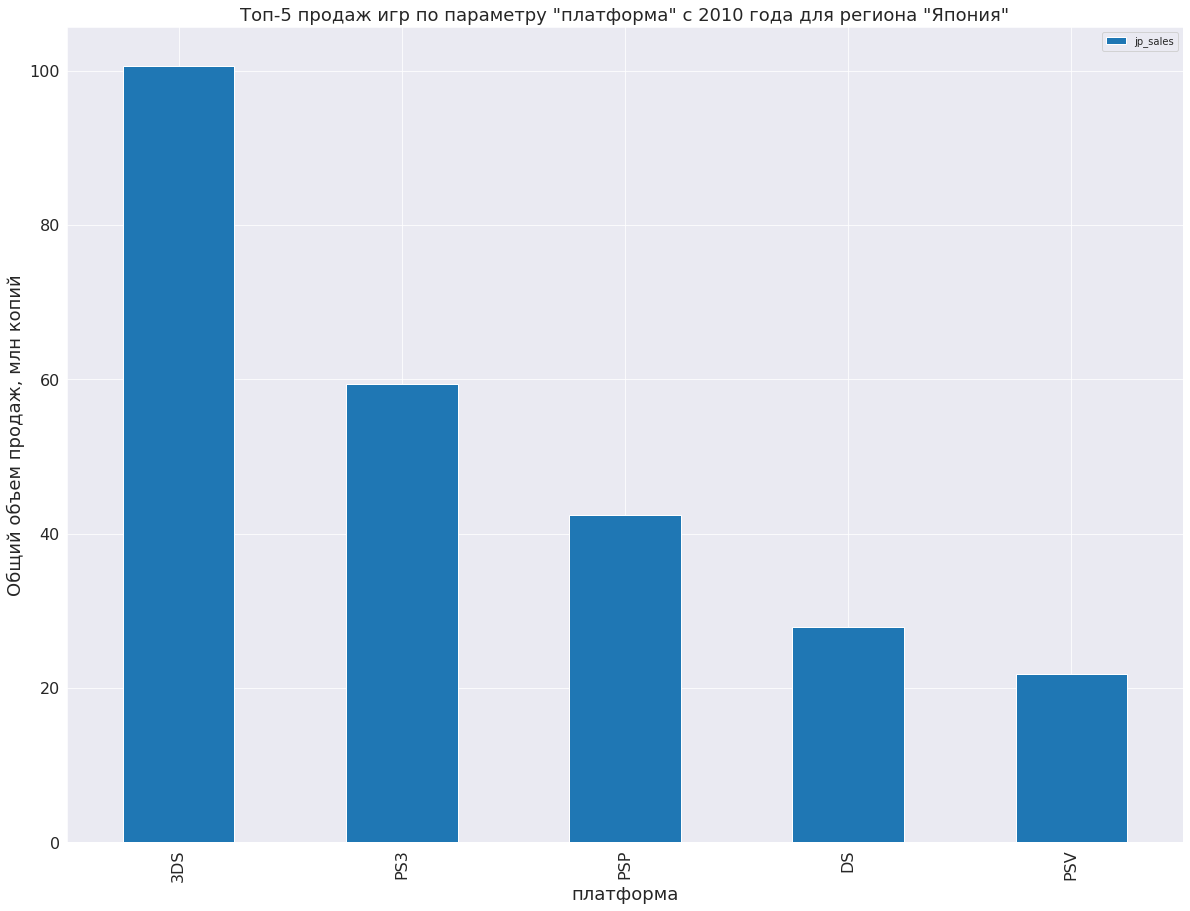

In [259]:
top5_builder(JP_sales.head(5), 'platform', 'jp_sales', 'платформа', 'Япония')

In [260]:
#Самые популярные жанры (топ-5) Северной Америки.

In [261]:
USA_sales = (
    (df[df['year_of_release']>=2010].                         
     groupby('genre')[['na_sales']].                        
     agg('sum').                      
     sort_values(by = 'na_sales', ascending=False).
     reset_index()
    )             
)
USA_sales

,genre,na_sales
0,Action,294.26
1,Shooter,238.50
2,Sports,157.49
3,Misc,124.39
4,Role-Playing,112.05
5,Platform,54.90
6,Racing,46.11
7,Fighting,39.05
8,Simulation,26.67
9,Adventure,20.84


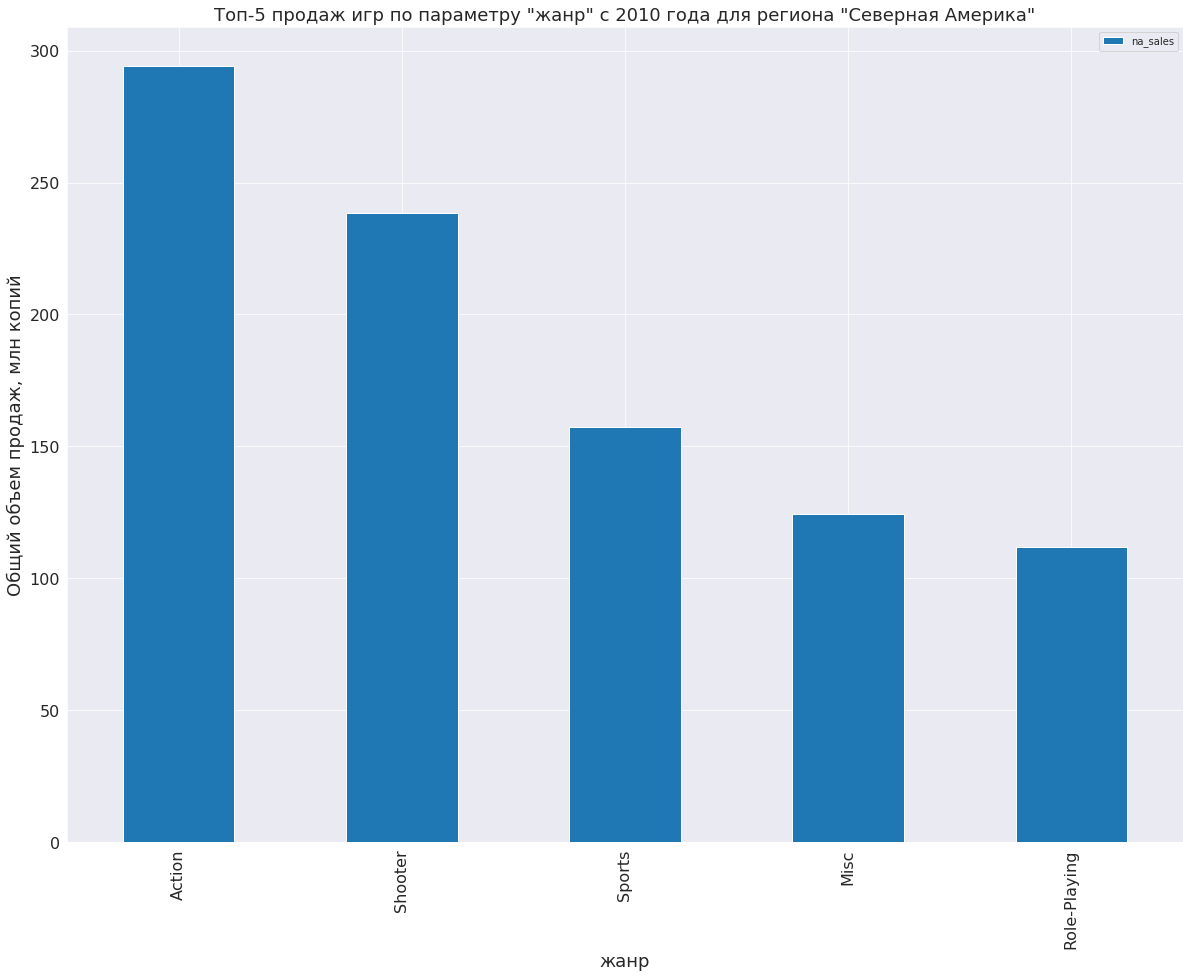

In [262]:
top5_builder(USA_sales.head(5), 'genre', 'na_sales', 'жанр', 'Северная Америка')

In [263]:
#Самые популярные жанры (топ-5) Европы.

In [264]:
EU_sales = (
    (df[df['year_of_release']>=2010].                         
     groupby('genre')[['eu_sales']].                        
     agg('sum').                      
     sort_values(by = 'eu_sales', ascending=False).
     reset_index()
    )             
)
EU_sales

,genre,eu_sales
0,Action,236.70
1,Shooter,172.57
2,Sports,117.09
3,Role-Playing,75.48
4,Misc,66.55
5,Racing,54.75
6,Platform,38.30
7,Simulation,26.39
8,Fighting,20.33
9,Adventure,18.88


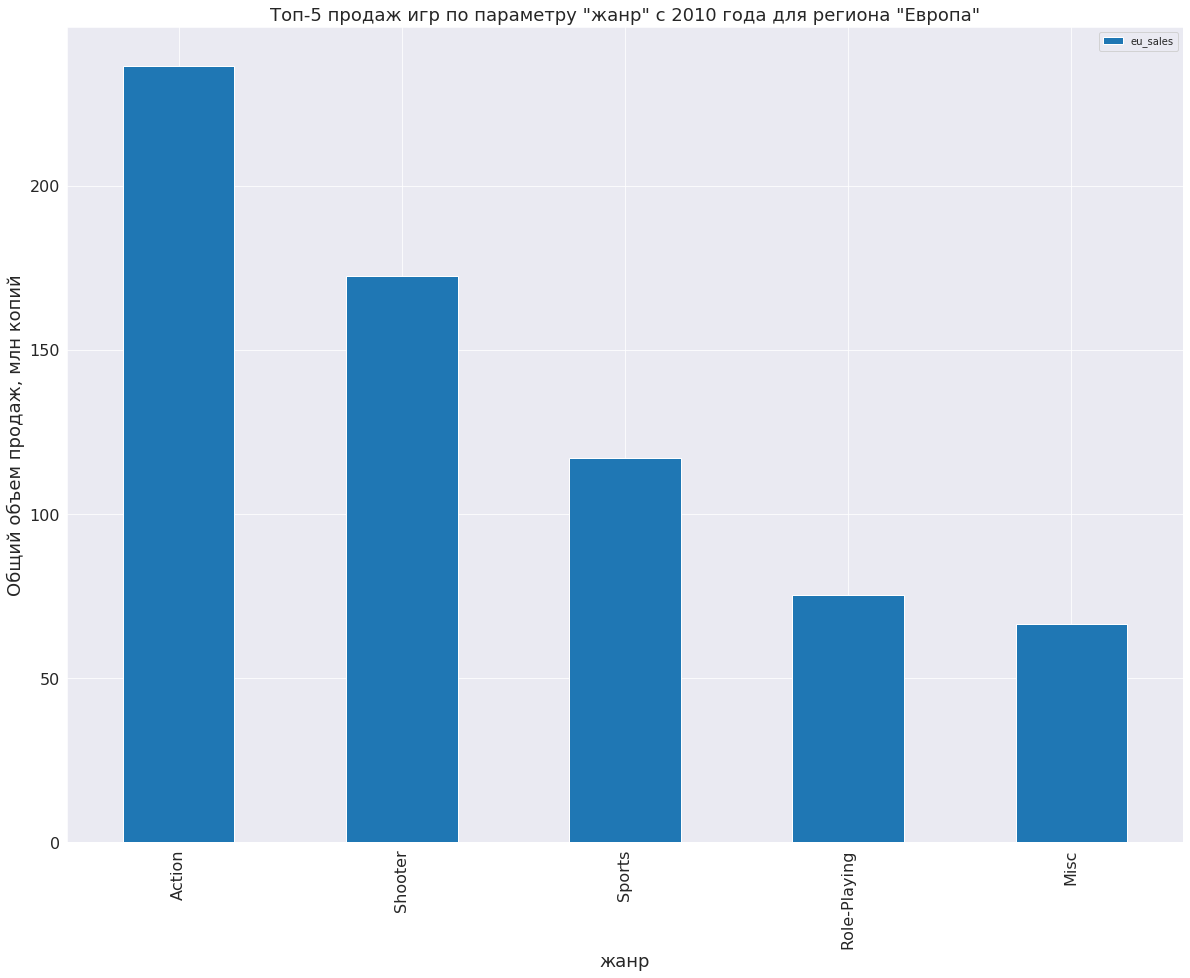

In [265]:
top5_builder(EU_sales.head(5), 'genre', 'eu_sales', 'жанр', 'Европа')

In [266]:
#финальная таблица по трем регионам
all_sales = (
    (df[df['year_of_release']>=2010].                         
     groupby('platform')[['na_sales','eu_sales','jp_sales']].                        
     agg('sum').                      
     sort_values(by = 'na_sales', ascending=False).
     reset_index()
    )             
)
all_sales

,platform,na_sales,eu_sales,jp_sales
0,X360,335.93,164.29,5.47
1,PS3,230.47,214.74,59.36
2,Wii,122.68,66.35,17.75
3,PS4,108.74,141.09,15.96
4,XOne,93.12,51.59,0.34
5,3DS,83.11,61.46,100.64
6,DS,60.42,28.34,27.90
7,PC,39.87,70.50,0.00
8,WiiU,38.10,25.13,13.01
9,PSV,12.47,13.07,21.84


In [267]:
#Самые популярные жанры (топ-5) Японии.

In [268]:
JP_sales = (
    (df[df['year_of_release']>=2010].                         
     groupby('genre')[['jp_sales']].                        
     agg('sum').                      
     sort_values(by = 'jp_sales', ascending=False).
     reset_index()
    )             
)
JP_sales

,genre,jp_sales
0,Role-Playing,103.59
1,Action,72.21
2,Misc,24.54
3,Platform,15.81
4,Adventure,15.67
5,Sports,15.53
6,Shooter,14.05
7,Fighting,13.90
8,Simulation,13.30
9,Strategy,6.83


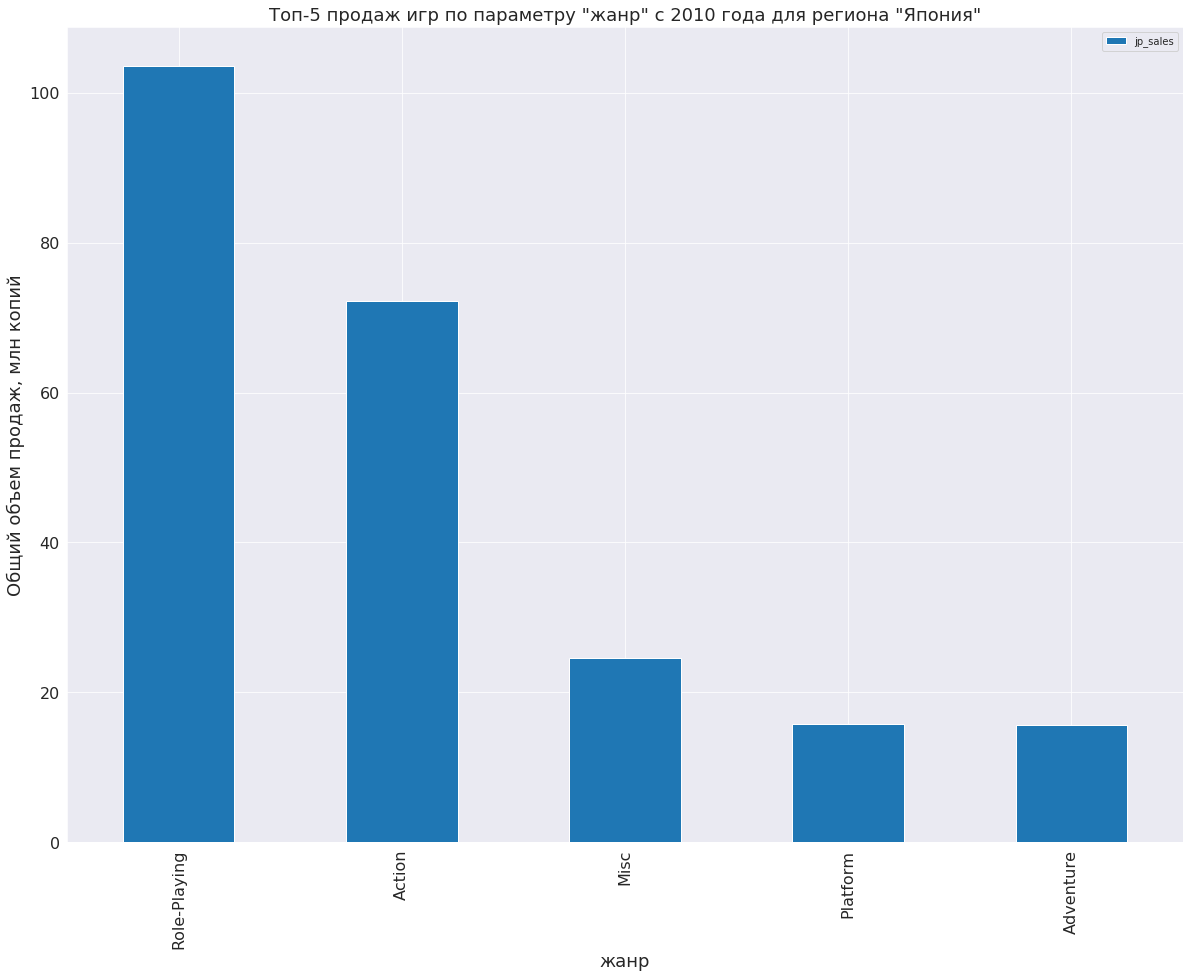

In [269]:
top5_builder(JP_sales.head(5), 'genre', 'jp_sales', 'жанр', 'Япония')

Информация по платформам:

- Топ-5 продаж по платформам в Северной Америке: X360, PS3, Wii, PS4, XOne
- Топ-5 продаж по платформам в Европе: PS3, X360, PS4, PC, Wii
- Топ-5 продаж по платформам в Японии: 3DS, PS3, PSP, DS, PSV

Информация по жанрам:
- Топ-5 продаж по жанрам в Северной Америке: Action, Shooter, Sports, Misc, Role-Playing
- Топ-5 продаж по жанрам в Европе: Action, Shooter, Sports, Role-Playing, Misc
- Топ-5 продаж по жанрам в Японии: Role-Playing, Action, Misc, Platform, Adventure

Можно заметить схожесть по популярности платформ и жанров в Северной Америке и Европе, а также различие по популярности платформ и жанров Северной Америки и Европы с Японией. Возможно, это связано с тем, что производители игр в Японии создают игры, которые нацелены на внутренний рынок (по платформам и жанрам, соответственно)

**Ответ на вопрос: Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [270]:
#строим таблицу рейтинг-продажи
rating_sales = (
    (df[df['year_of_release']>=2010].                         
     groupby('rating')[['na_sales','eu_sales','jp_sales']].                        
     agg('sum').                      
     sort_values(by = 'na_sales', ascending=False).
     reset_index()
    )             
)
rating_sales

,rating,na_sales,eu_sales,jp_sales
0,M,384.23,294.29,30.47
1,E,274.06,197.98,47.87
2,E10+,161.61,101.16,13.22
3,T,161.21,113.29,42.14


Наибольшие продажи для Северно Америки и Европы "M" - для людей старше 17 лет, а для Японии "Е" - для детей старше 6 лет

**Вывод по пункту 4:**

- Можно заметить схожесть по популярности платформ и жанров в Северной Америке и Европе, а также различие по популярности платформ и жанров Северной Америки и Европы с Японией. Возможно, это связано с тем, что производители игр в Японии создают игры, которые нацелены на внутренний рынок (по платформам и жанрам, соответственно)
- Топ продаж по платформам в Европе и Северной Америке: PS3, X360, PS4, Wii, PC, XOne, а для Японии: 3DS, PS3, PSP, DS, PSV.
- Топ продаж по жанрам в Европе и Северной Америке: Action, Shooter, Sports, Misc, Role-Playing, а в Японии: Role-Playing, Action, Misc, Platform, Adventure
- В Северной Америке и Европе тренды схожи не только по топу платформ и жанров, но и по рейтингу. Аналогично с различием, тренды для Японии отличаются от Северной Америки и Европы.
- Наибольшие продажи для Северно Америки и Европы по рейтингу "M" - для людей старше 17 лет, а для Японии "Е" - для детей старше 6 лет

## Проверка гипотез

**Проверим гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

In [271]:
#находим дисперсию для выборки с платформой PC
np.std(df[(df['platform'] == 'PC') & (df['year_of_release'] >= 2012)]['user_score'])

1.6535230559142144

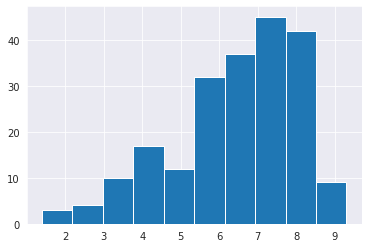

In [272]:
#находим распределение пользовательских оценок для платформы PC
df[(df['platform'] == 'PC') & (df['year_of_release'] >= 2012)]['user_score'].hist(bins=10);

In [273]:
#находим дисперсию для выборки с платформой XOnce
np.std(df[(df['platform'] == 'XOne') & (df['year_of_release'] >= 2012)]['user_score'])

1.377141546212499

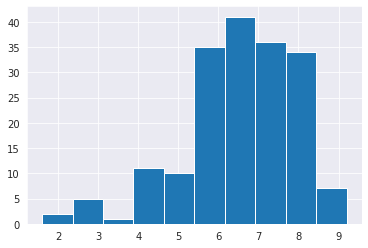

In [274]:
#находим распределение пользовательских оценок для платформы XOne
df[(df['platform'] == 'XOne') & (df['year_of_release'] >= 2012)]['user_score'].hist(bins=10);

- Нулевая гипотеза H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Альтернативная гипотеза H1: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые
- Уровень значимости: 0.05
- Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам (выборки не связаны между собой) используем метод scipy.stats.ttest_ind(array1, array_2, equal_var)
- Дисперсии отличаются, значит equal_var = False

In [275]:
alpha = 0.05

array_1 = df[(df['platform'] == 'PC') & (df['year_of_release'] >= 2012)]['user_score']
array_2 = df[(df['platform'] == 'XOne') & (df['year_of_release'] >= 2012)]['user_score']

results = st.ttest_ind(array_1.dropna(), array_2.dropna(), equal_var = False)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value:  0.6206366351489678
Не получилось отвергнуть нулевую гипотезу


Принимаем исходную гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Проверим гипотезу: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

In [276]:
#находим дисперсию для выборки с жанром Action 
np.std(df[(df['genre'] == 'Action') & (df['year_of_release'] >= 2012)]['user_score'])

1.3705375770847252

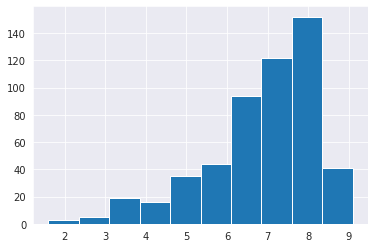

In [277]:
#находим распределение пользовательских оценок для жанра Action
df[(df['genre'] == 'Action') & (df['year_of_release'] >= 2012)]['user_score'].hist(bins=10);

In [278]:
#находим дисперсию для выборки с жанром Sports 
np.std(df[(df['genre'] == 'Sports') & (df['year_of_release'] >= 2012)]['user_score'])

1.7341823137066392

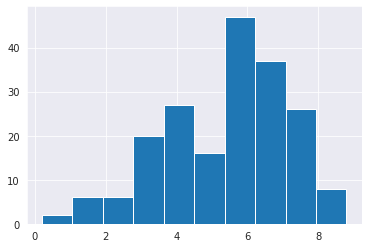

In [279]:
#находим распределение пользовательских оценок для жанра Sports
df[(df['genre'] == 'Sports') & (df['year_of_release'] >= 2012)]['user_score'].hist(bins=10);

- Нулевая гипотеза H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- Альтернативная гипотеза H1: Средние пользовательские рейтинги жанров Action и Sports не одинаковые
- Уровень значимости: 0.05
- Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам (выборки не связаны между собой) используем метод scipy.stats.ttest_ind(array1, array_2, equal_var)
- Дисперсии отличаются, значит equal_var = False

In [280]:
alpha = 0.05

array_1 = df[(df['genre'] == 'Action') & (df['year_of_release'] >= 2012)]['user_score']
array_2 = df[(df['genre'] == 'Sports') & (df['year_of_release'] >= 2012)]['user_score']

results = st.ttest_ind(array_1.dropna(), array_2.dropna(), equal_var = False)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value:  2.337200239591976e-20
Отвергаем нулевую гипотезу


Принимаем исходную гипотезу, что средние пользовательские рейтинги жанров Action и Sports не одинаковые

**Вывод по пункту 5:**

- Принимаем первую исходную гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Нулевую гипотезу не получилось отвергнуть
- Принимаем вторую исходную гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные. Отвергнули нулевую гипотезу в пользу альтернативной

## Написание общего вывод

**По общему осмотру данных имеем:**
- Файл games.csv, изначально содержащий 16715 записей с 11 параметрами, был проанализирован и обработан. После обработки - осталось 16710 записей по 12 параметрам.
- Были обработаны пропуски столбцов Name, Genre, Year_of_Release, User_Score, Rating
- Для продаж выявлено распределение, близкое к распределению Пуассона. Также можно отметить бОльшие продажи в С. Америке, далее по убыванию в Японии и в Европе. По остальным странам продажи меньше, чем в рассматриваемых трех странах.
- Посчитали суммарные продажи во всех регионах и добавили эту информацию в таблицу. Две записи с нулевыми продажами были удалены.
- Желательно выяснить, с чем связано такое количество пропусков в данных по столбцам оценки пользователей, критиков, а также категориального рейтинга игры (возможно, проблема при сборе или выгрузке).

**По исследованию данных имеем:**
- По данным были выделены постепенный рост релизов с 1990 года, пик в 2007 - 2010 годах и резкий спад в количестве релизов после 2010 года. Данные до 1990 года не актуальны. Данные от 1990 до 2012 года - постепенный рост кол-ва релизов и резкое падение 2010-2012 годов, возможно, из-за развития других сфер развлечений. Следовательно, актуальный период приняли с 2010 года, когда тренд количества релизов стал более очевидным.
- Игровые приставки в среднем популярны около 5 лет.
- Самим популярными платформами за время с 2015 года являются PS4, XOne, 3DS, WiiU, PS3, PC, X360, PSV, Wii, PSP. Для  исследования использовали самую представительную модель компании: PS4, XOne, 3DS, WiiU, PC.

**По продажам ключевых приставок имеем:**
- 3DS - Рост с 2010 - 2011 гг, планка (60 млн копий) 2011 - 2013 гг., плавное падение с 2013 - 2016 гг
- PC - Плавное падение с 2011 г (35 млн копий) до 2016 года (около 7 - 8 млн копий)
- WiiU - Плавный рост с 2012 - 2014 гг (пик - чуть более 20 млн копий), падение с 2014 - 2016 гг (до 7 - 8 млн копий
- PS4 - значительный рост с 2013 - 2015 гг (пик - самый большой относительно остальных платформ - почти 120 млн копий), и стремительное падение к 2016 (до 70 млн копий)
- XOne - поведение аналогично PS4 по периодам роста и спада, однако меньший пик покупок (60 млн копий), а падение примерно до 25 млн копий
- Все платформы находятся в состоянии падения по продажам на 2016 год.
- Для всех платформ среднее значение (c 2010 года) больше, чем медиана. Из диаграммы размаха наблюдаем большое количество выбросов, которые не будем удалять сохранения данных для анализа. Наибольшее среднее значение продаж - для PS4 (0.8 млн копий), наименьшее - для PC (0.26 млн копий). Наибольшая медиана продаж - WiiU и XOne (0.22 млн копий), наименьшая - PC (0.08 млн копий). Наибольшая дисперсия - для PS4, наименьшая - для PC.
- Интересно заметить, что хоть среднее значение продаж больше для PS4, но медианные продажи больше для WiiU и XOne. Это говорит о бОльшей стабильности продаж последних (WiiU и XOne).

**По рынкам регионов имеем:**
- Можно заметить схожесть по популярности платформ и жанров в Северной Америке и Европе, а также различие по популярности платформ и жанров Северной Америки и Европы с Японией. Возможно, это связано с тем, что производители игр в Японии создают игры, которые нацелены на внутренний рынок (по платформам и жанрам, соответственно)
- Топ продаж по платформам в Европе и Северной Америке: PS3, X360, PS4, Wii, PC, XOne, а для Японии: 3DS, PS3, PSP, DS, PSV.
- Топ продаж по жанрам в Европе и Северной Америке: Action, Shooter, Sports, Misc, Role-Playing, а в Японии: Role-Playing, Action, Misc, Platform, Adventure
- В Северной Америке и Европе тренды схожи не только по топу платформ и жанров, но и по рейтингу. Аналогично с различием, тренды для Японии отличаются от Северной Америки и Европы.
- Наибольшие продажи для Северно Америки и Европы по рейтингу: "M" - для людей старше 17 лет, а для Японии "Е" - для детей старше 6 лет

**По проверке гипотез имеем:**
- Приняли первую исходную гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Нулевую гипотезу не получилось отвергнуть
- Приняли вторую исходную гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные. Отвергнули нулевую гипотезу в пользу альтернативной